# Required Libraries

In [3]:
import numpy as np
import neurokit2 as nk
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage.measure import block_reduce
from scipy.fft import fft
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import numpy as np
import array
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import copy
import gc
from scipy.signal import butter, filtfilt
from scipy import signal
from scipy import interpolate
# Required libraries
import scipy.io as sio
from scipy import signal
from scipy.signal import find_peaks
import math
import neurokit2 as nk

%matplotlib inline 

# Importing datasets and some pre-processing

# This part includes following parts:
### 1. Importing data
### 2. bandpass filter and signal filtering
### 3. Normalization function

In [4]:
# Importing datasets and convert to Numpy array.
signal1 = sio.loadmat('C:/Users/nnevar/Desktop/Augmentation Visualisation/E00001.mat')
sig = np.array(signal1['val'])



def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(signal, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# A performance metric is defined (MSE)

def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse



######SIGNAL FILTERING#######



lowcut = 0.5  # Lower cutoff frequency
highcut = 50  # Higher cutoff frequency
fs = 250  # Sampling frequency
order = 2  # Order of the Butterworth filter

filtered_signal = apply_bandpass_filter(sig, lowcut, highcut, fs, order)
np.save('filtered_signal.npy', filtered_signal)

######NORMALIZATION#######


def normalize(mseq, norm_type="0-1"):
    if norm_type == "0-1":
        for i, row in enumerate(mseq):
            if sum(mseq[i, :] == 0):
                mseq[i, :] = mseq[i, :]
            else:
                mseq[i,:] = (row - np.min(row)) / (np.max(row) - np.min(row))
    elif norm_type == "mean-std":
        for i, row in enumerate(mseq):
            mseq[i,:] = (row - np.mean(row)) / np.std(row)
    elif norm_type == "none":
        pass
    else:
        raise NameError('This normalization is not included!')
    return mseq


normalized_data = normalize(filtered_signal, norm_type = "0-1")
signal_1st = filtered_signal[1,:]
signal_1st = np.reshape(signal_1st,(len(signal_1st),1))

# Plotting Signals

The diagram displays the ECG signal from E00001.mat, featuring all 12-lead signals. To enhance visibility, I have adjusted the baseline of each of the 12-lead signals.

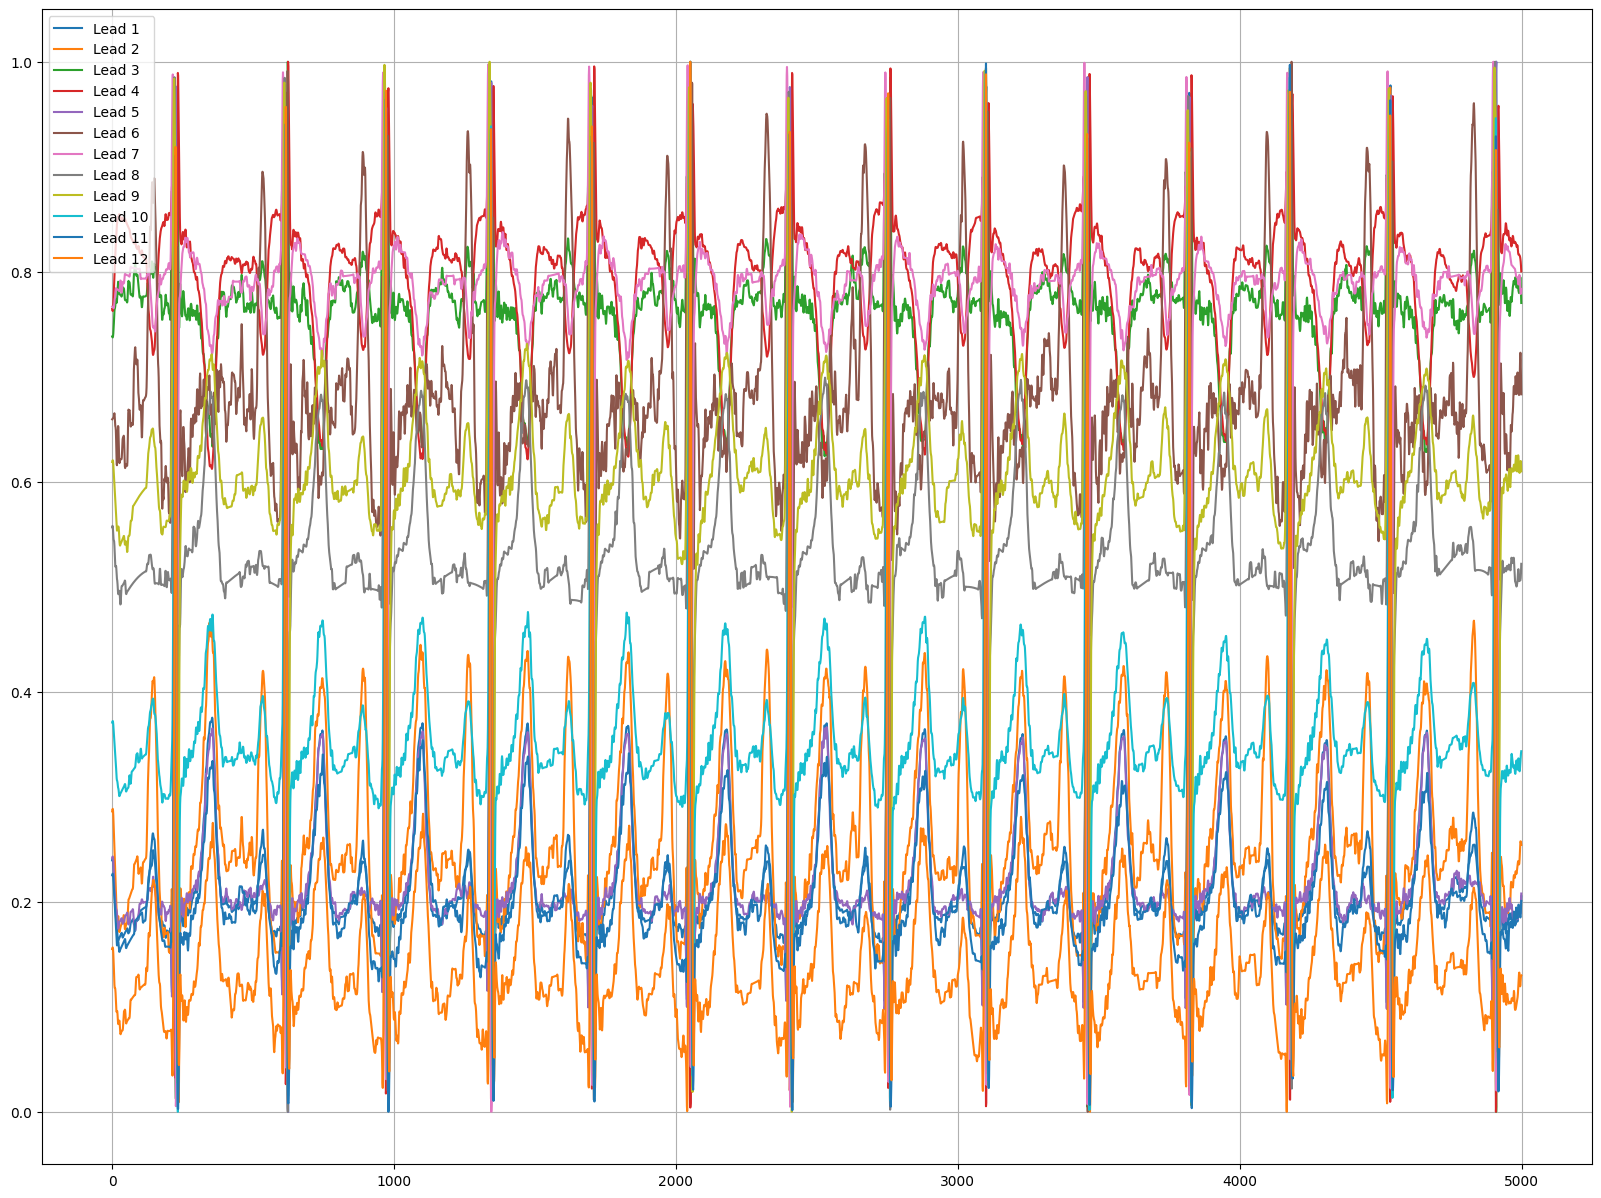

In [5]:
plt.figure(figsize=(20,15))
for i in range(filtered_signal.shape[0]):
    plt.plot(filtered_signal[i, :], label='Lead {}'.format(i+1))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## Note: The visualization will be done for the first lead signal

The 1st-lead signal will be presented visually and contrasted with its altered rendition. Given that the transformed signal is expected to closely mimic the behavior of the original signal while maintaining smoothness, this approach facilitates the observation of how signal transformations impact the signal's behavior.

# ADD NOISE

add_noise is designed to introduce noise to a given input signal.


This code demonstrates the application of this noise addition to a specific signal. The noisy signal is plotted alongside the original portion of the signal. The purpose of this visualization is to show how the signal transforms when noise is added, allowing for an examination of the effect of noise on the signal's behavior.

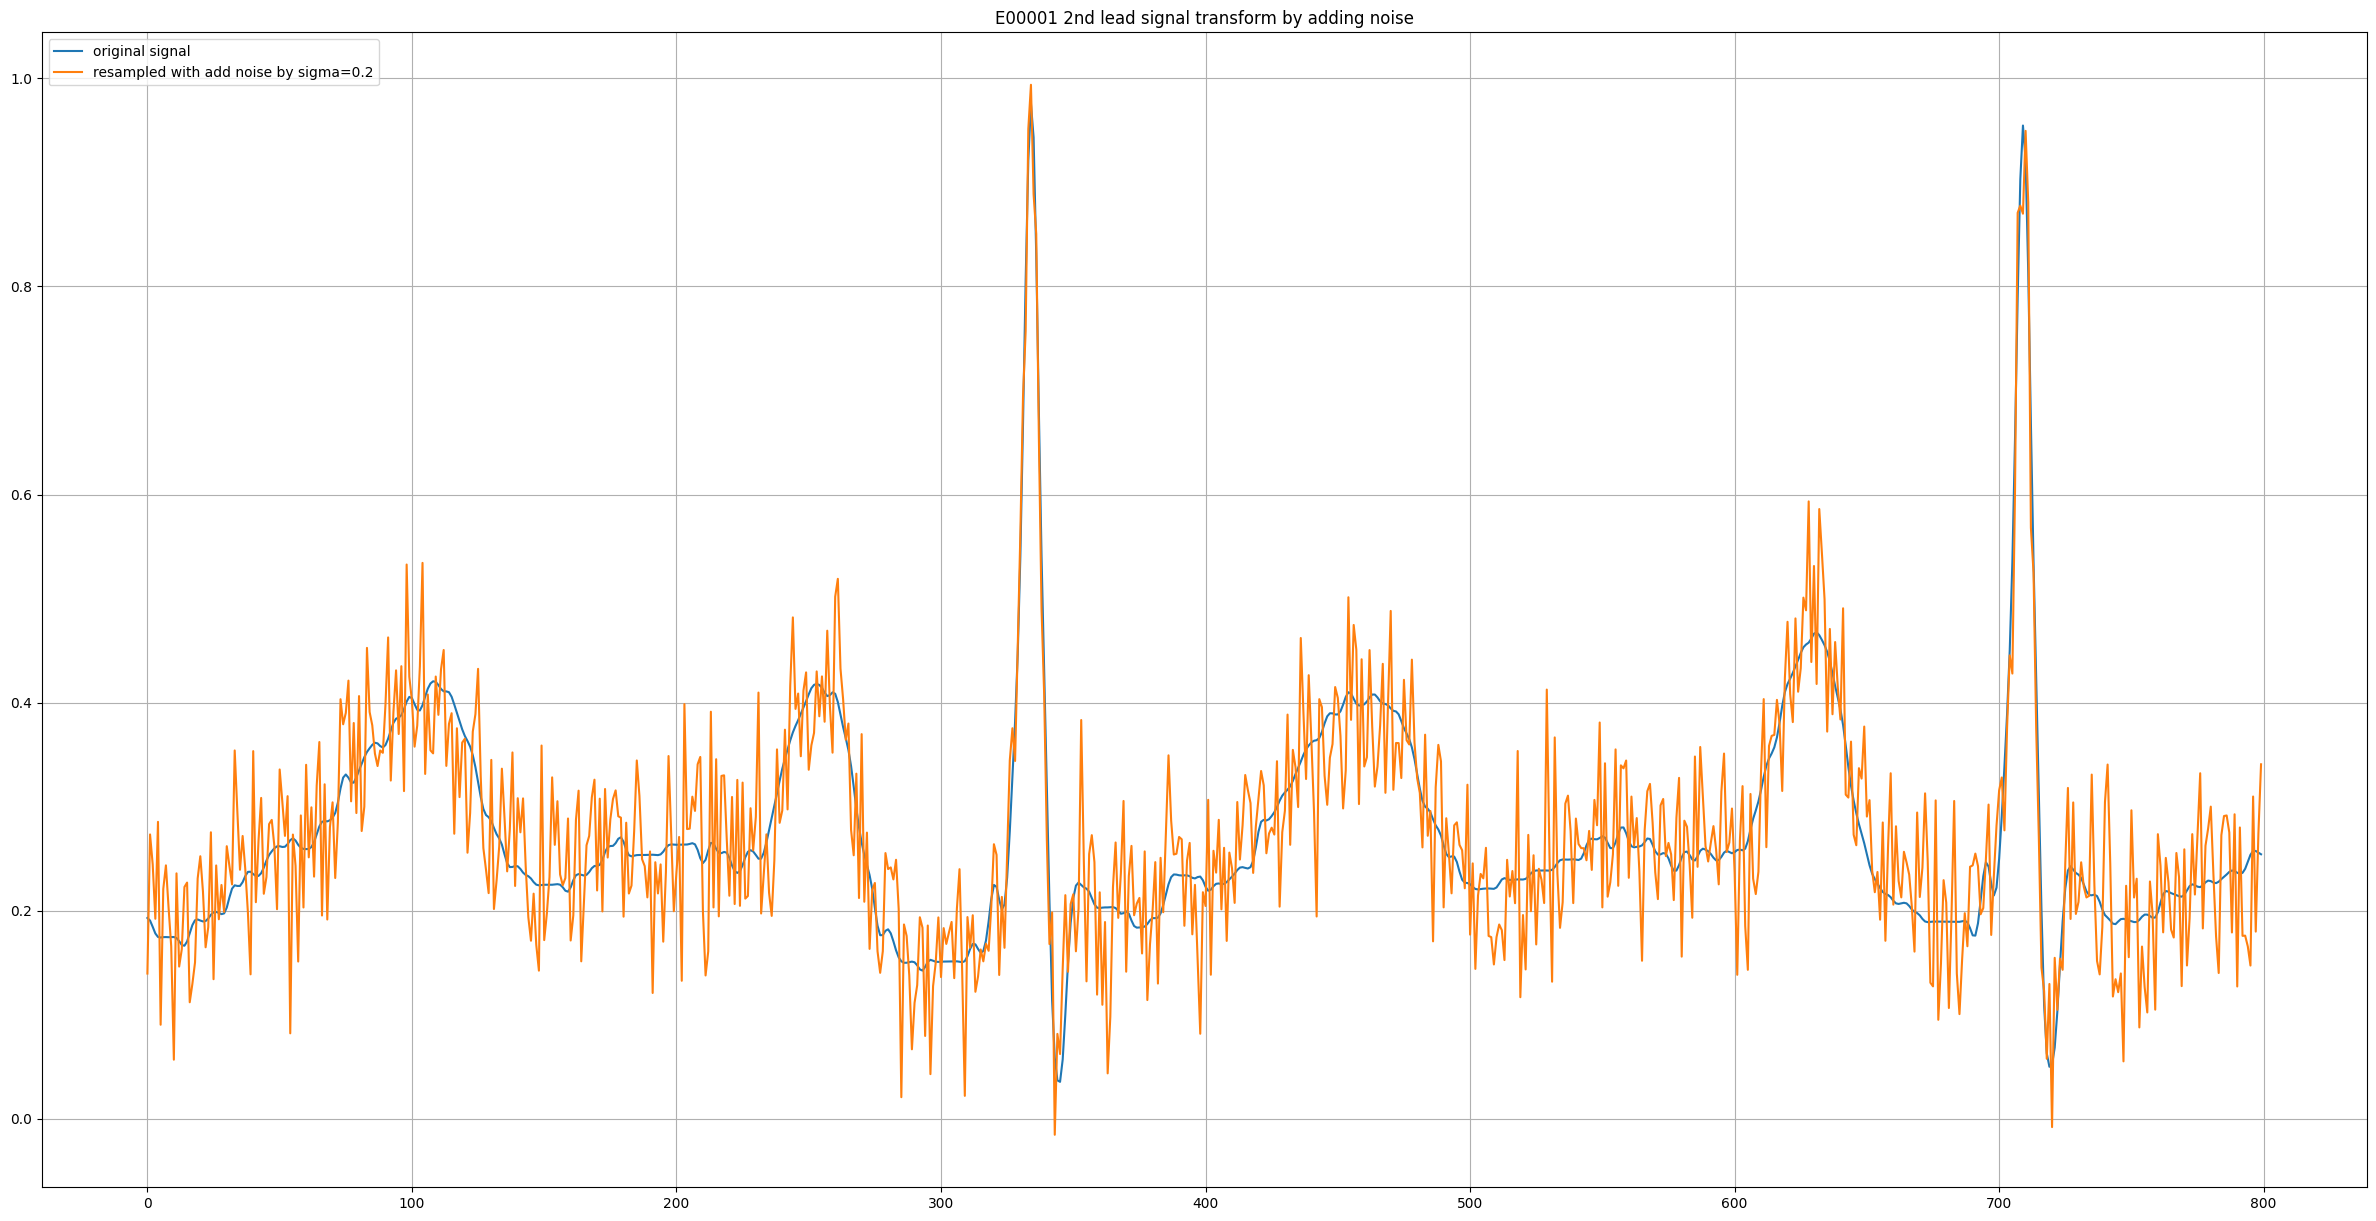

In [6]:
def add_noise(mseq, sigma, p):
    np.random.seed(123)
    #copy of mseq
    mseq=copy.deepcopy(mseq)
    
    if p < np.random.rand(1):
        return mseq
    sigma = np.random.uniform(0, sigma)     
    #sigma=sigma
    mseq1 = mseq + np.random.normal(loc=0, scale=sigma, size=mseq.shape)
    return mseq1

adn = add_noise(signal_1st, sigma=0.2, p = 1)

plt.figure(figsize=(30,15))
plt.plot(signal_1st[(len(signal_1st)-800):])
plt.plot(adn[(len(adn)-800):])

plt.legend(("original signal", "resampled with add noise by sigma=0.2",), loc='upper left')
plt.title("E00001 2nd lead signal transform by adding noise")
plt.grid(True)
plt.show()

# ROLL

 roll is designed to perform a signal transformation known as rolling, which involves shifting the elements of an input signal by a random number of positions. The code demonstrates the application of the rolling transformation to a specific signal. The rolled signal is plotted alongside the original signal for comparison.

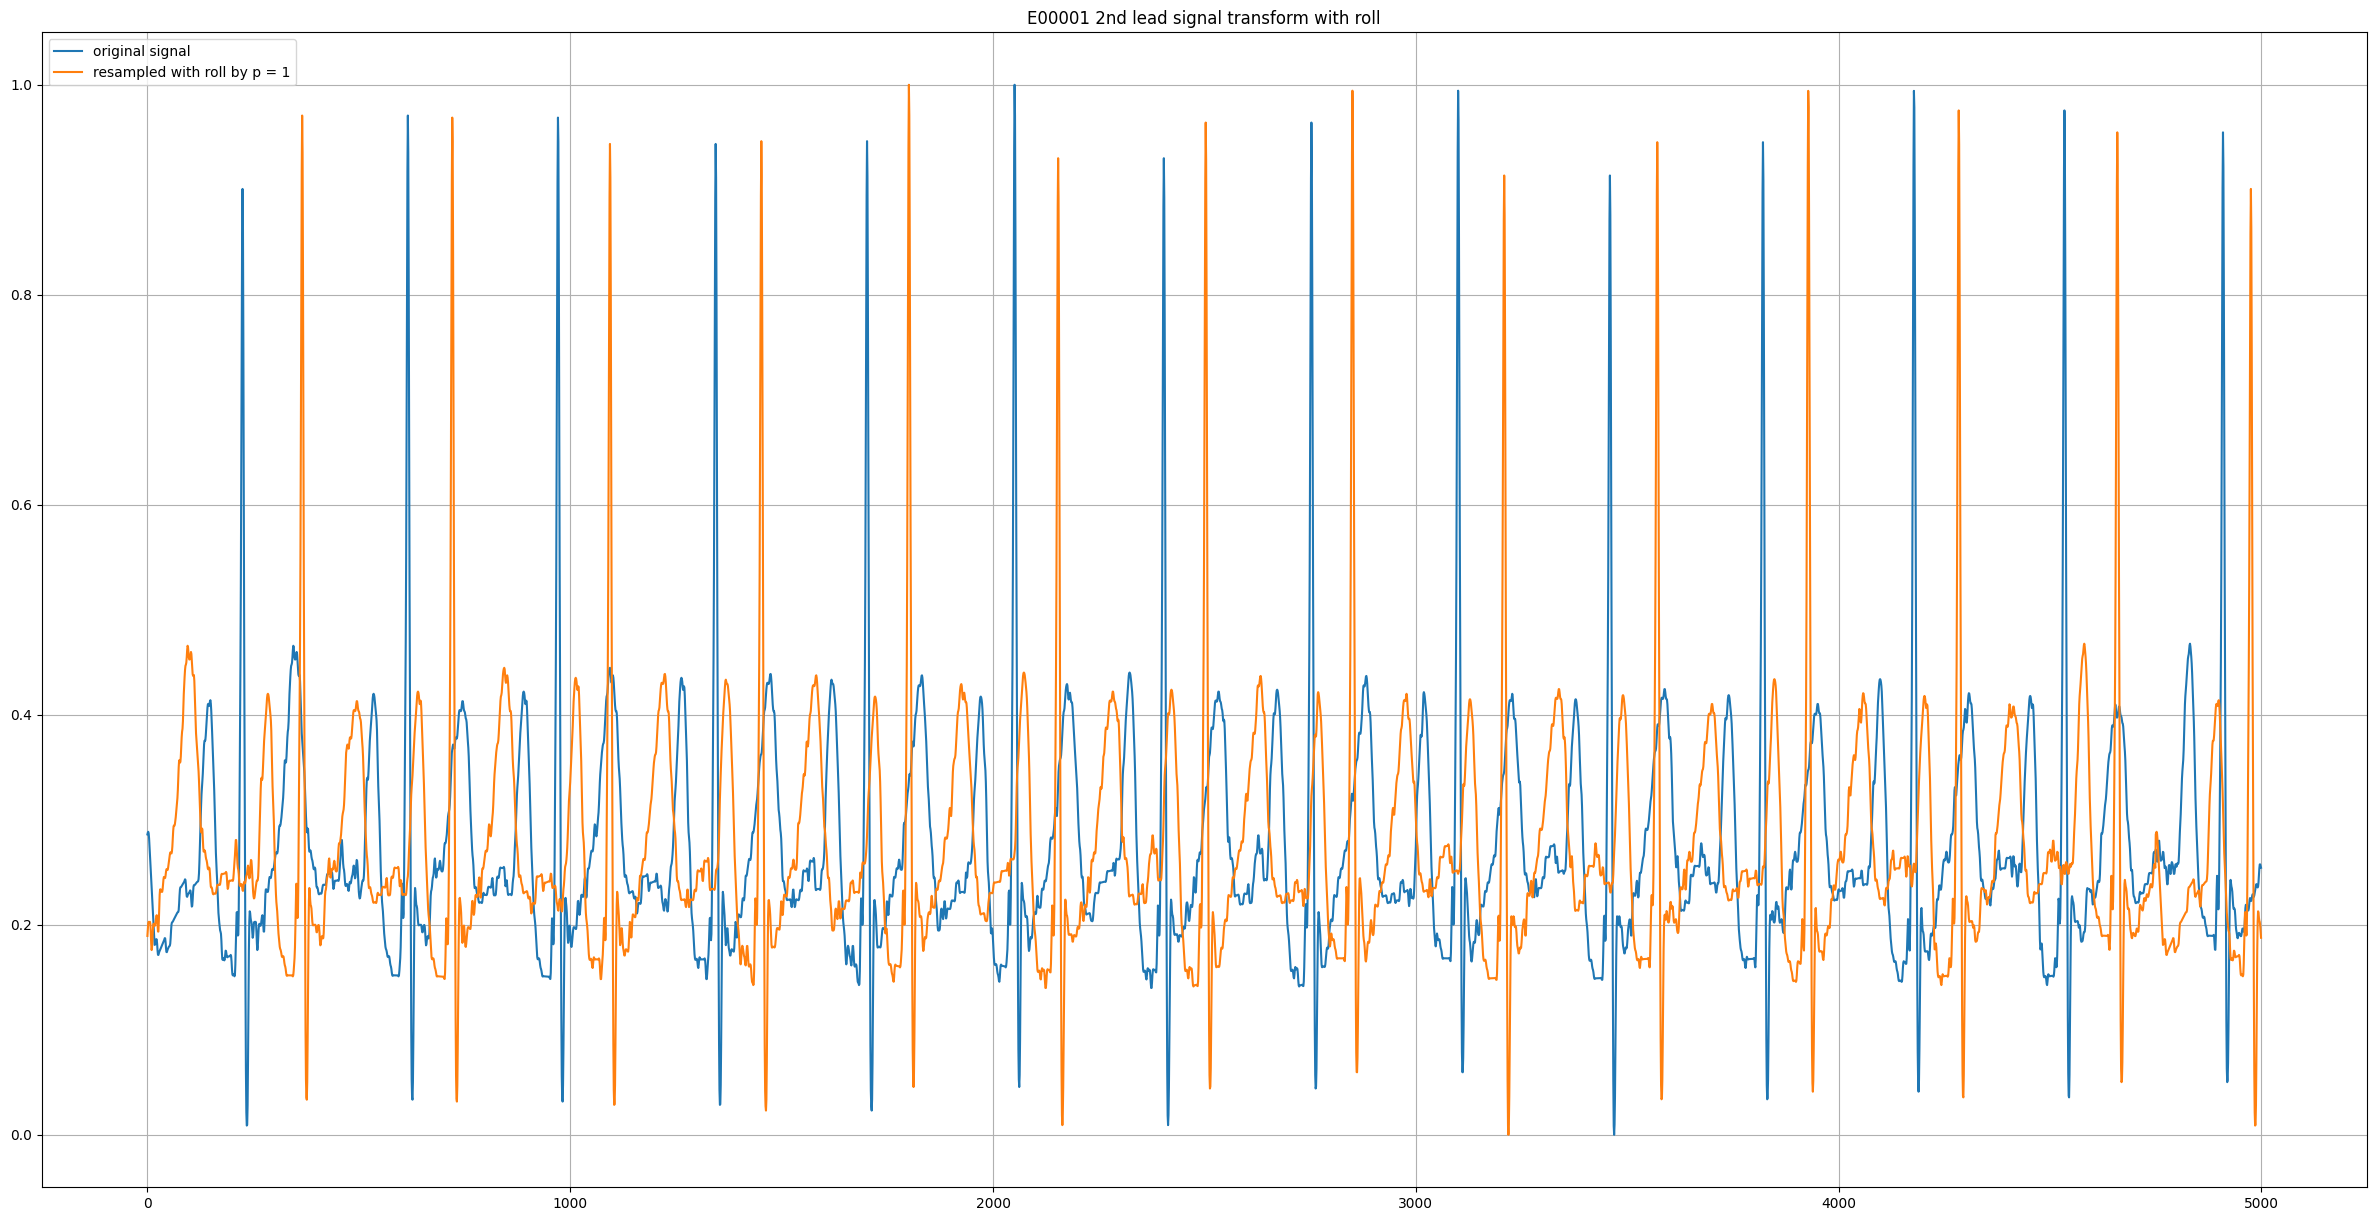

In [7]:
def roll(mseq, p, n=250):
    mseq=copy.deepcopy(mseq)
    if p < np.random.rand():
        return mseq
    np.random.seed(0)
    sign = np.random.choice([-1, 1])
    mseq1 = np.roll(mseq, sign * n)
    return mseq1

roll = roll(signal_1st, p = 1)

plt.figure(figsize=(30,15))
plt.plot(signal_1st)
plt.plot(roll)
plt.legend(("original signal", "resampled with roll by p = 1",), loc='upper left')
plt.title("E00001 2nd lead signal transform with roll")
plt.grid(True)
plt.show()

# FLIPY

Flipy is designed to perform a signal transformation referred to as "flipy". The subsequent code demonstrates the application of the "flipy" transformation to a specific signal. The primary objective of this visualization is to showcase how the signal's behavior changes when the "flipy" transformation is employed, thereby illustrating the impact of this transformation on the signal's characteristics.

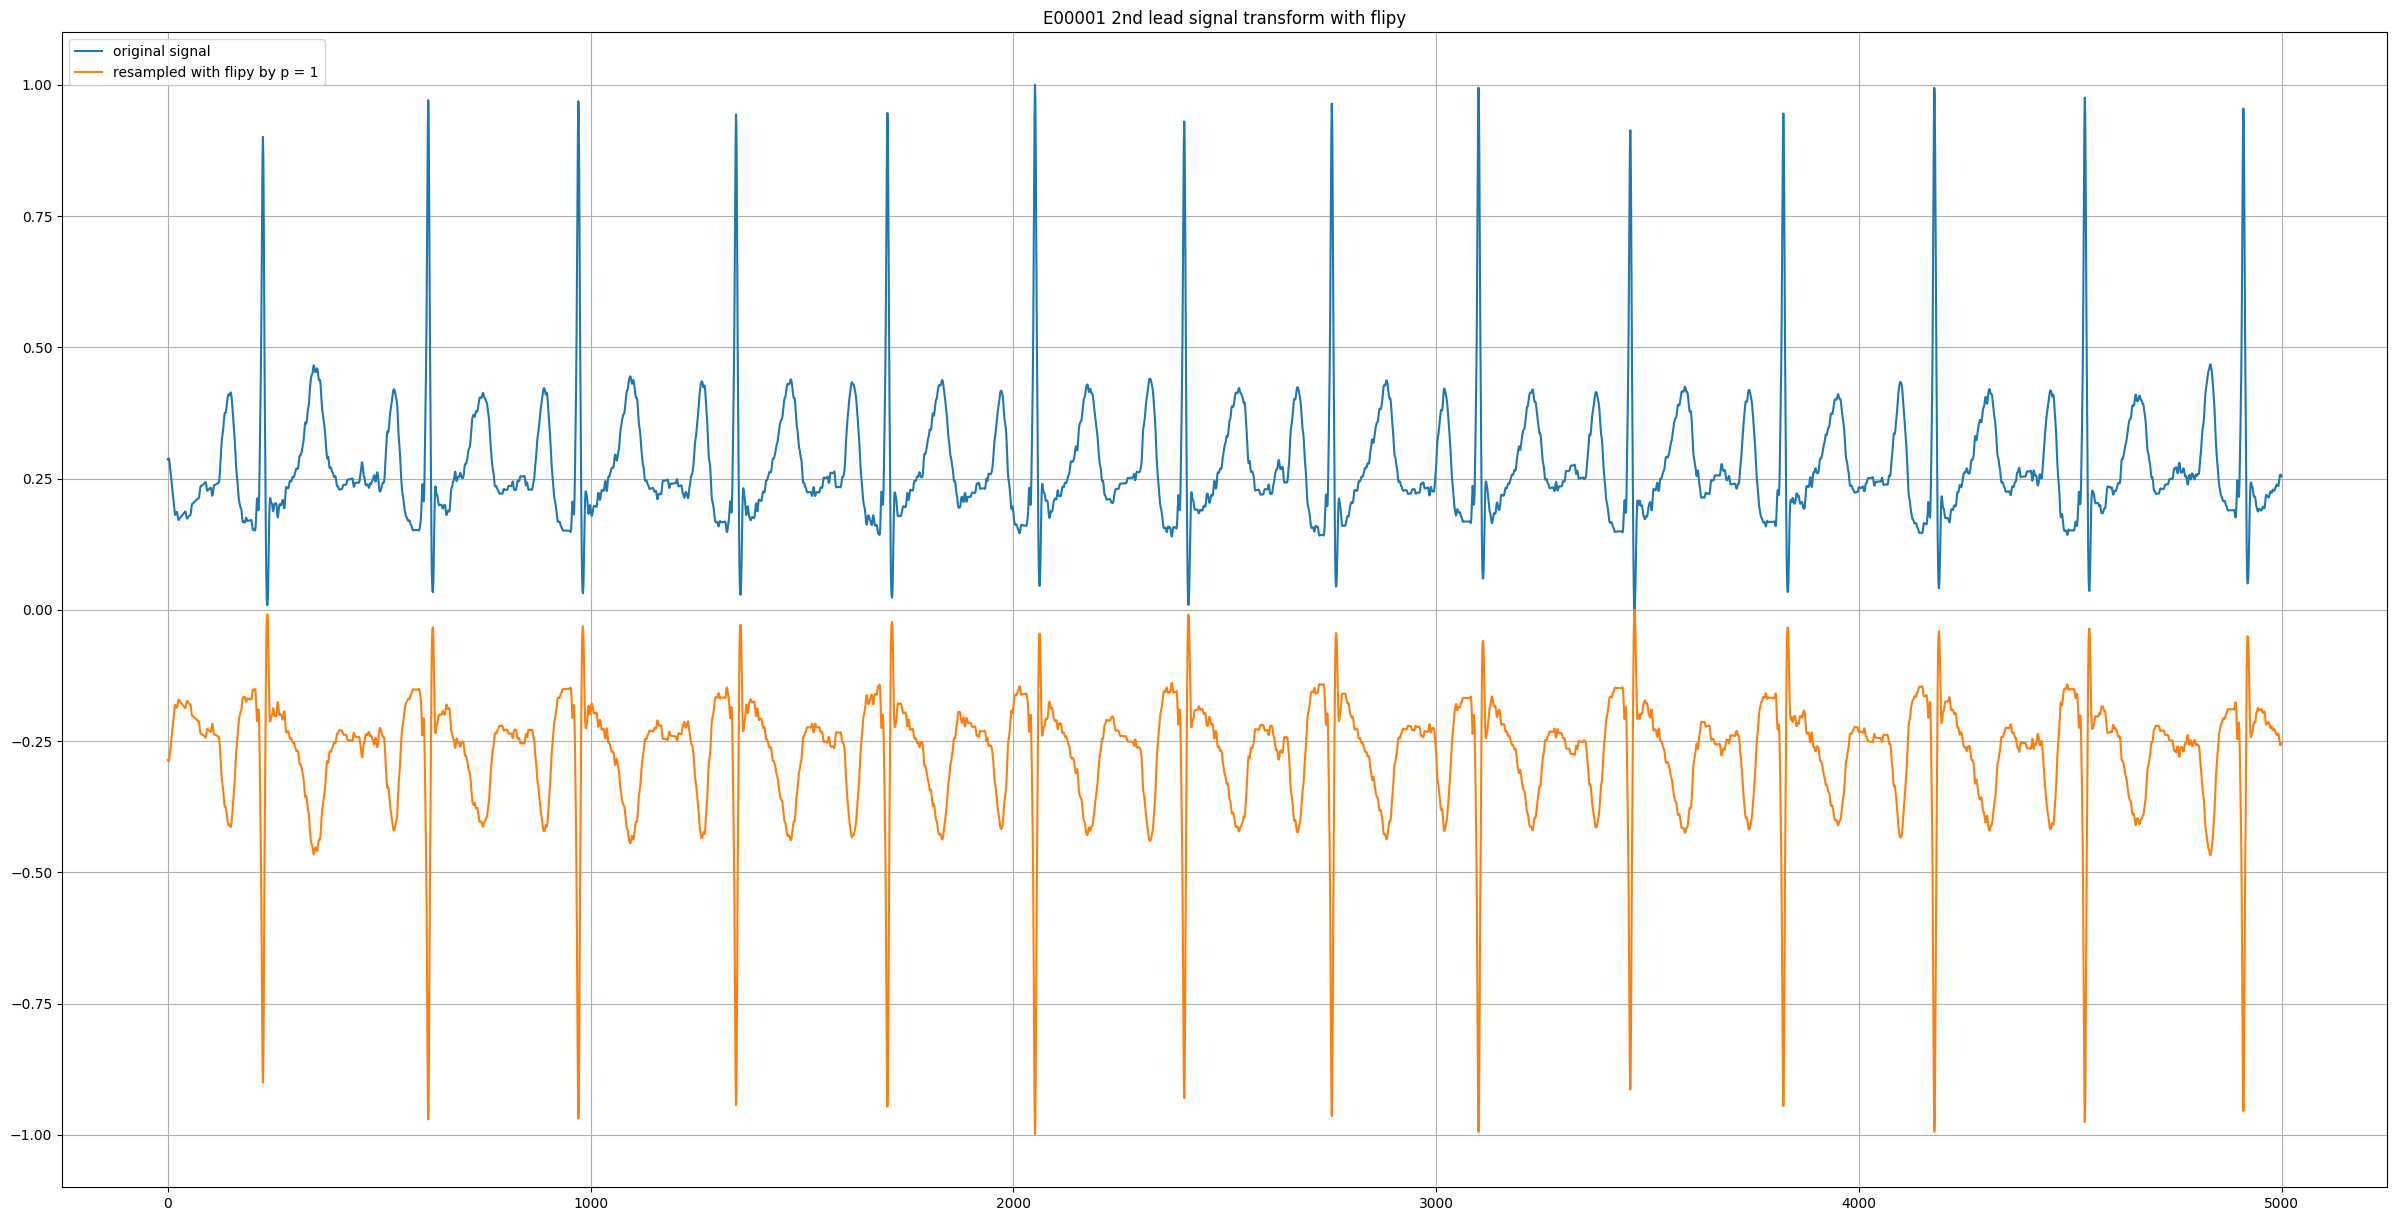

In [8]:
def Flipy(mseq, p):
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    mseq1 = np.zeros(len(mseq))
    for i in range(len(mseq)):
        mseq1[i] = -mseq[i]

    return mseq1

flipy = Flipy(signal_1st, p = 1)

plt.figure(figsize=(30,15))
plt.plot(signal_1st) # Since the best P_value is 0, Flipy does not change the array. 
plt.plot(flipy)
plt.legend(("original signal", "resampled with flipy by p = 1"), loc='upper left')
plt.title("E00001 2nd lead signal transform with flipy")
plt.grid(True)
plt.show()

# FLIPX

Flipx is designed to perform a signal transformation known as "flipx". The subsequent code demonstrates the application of the "flipx" transformation to a specific signal. The main purpose of this visualization is to illustrate how the signal's behavior changes when the "flipx" transformation is applied, providing insight into the effects of this transformation on the signal's characteristics.

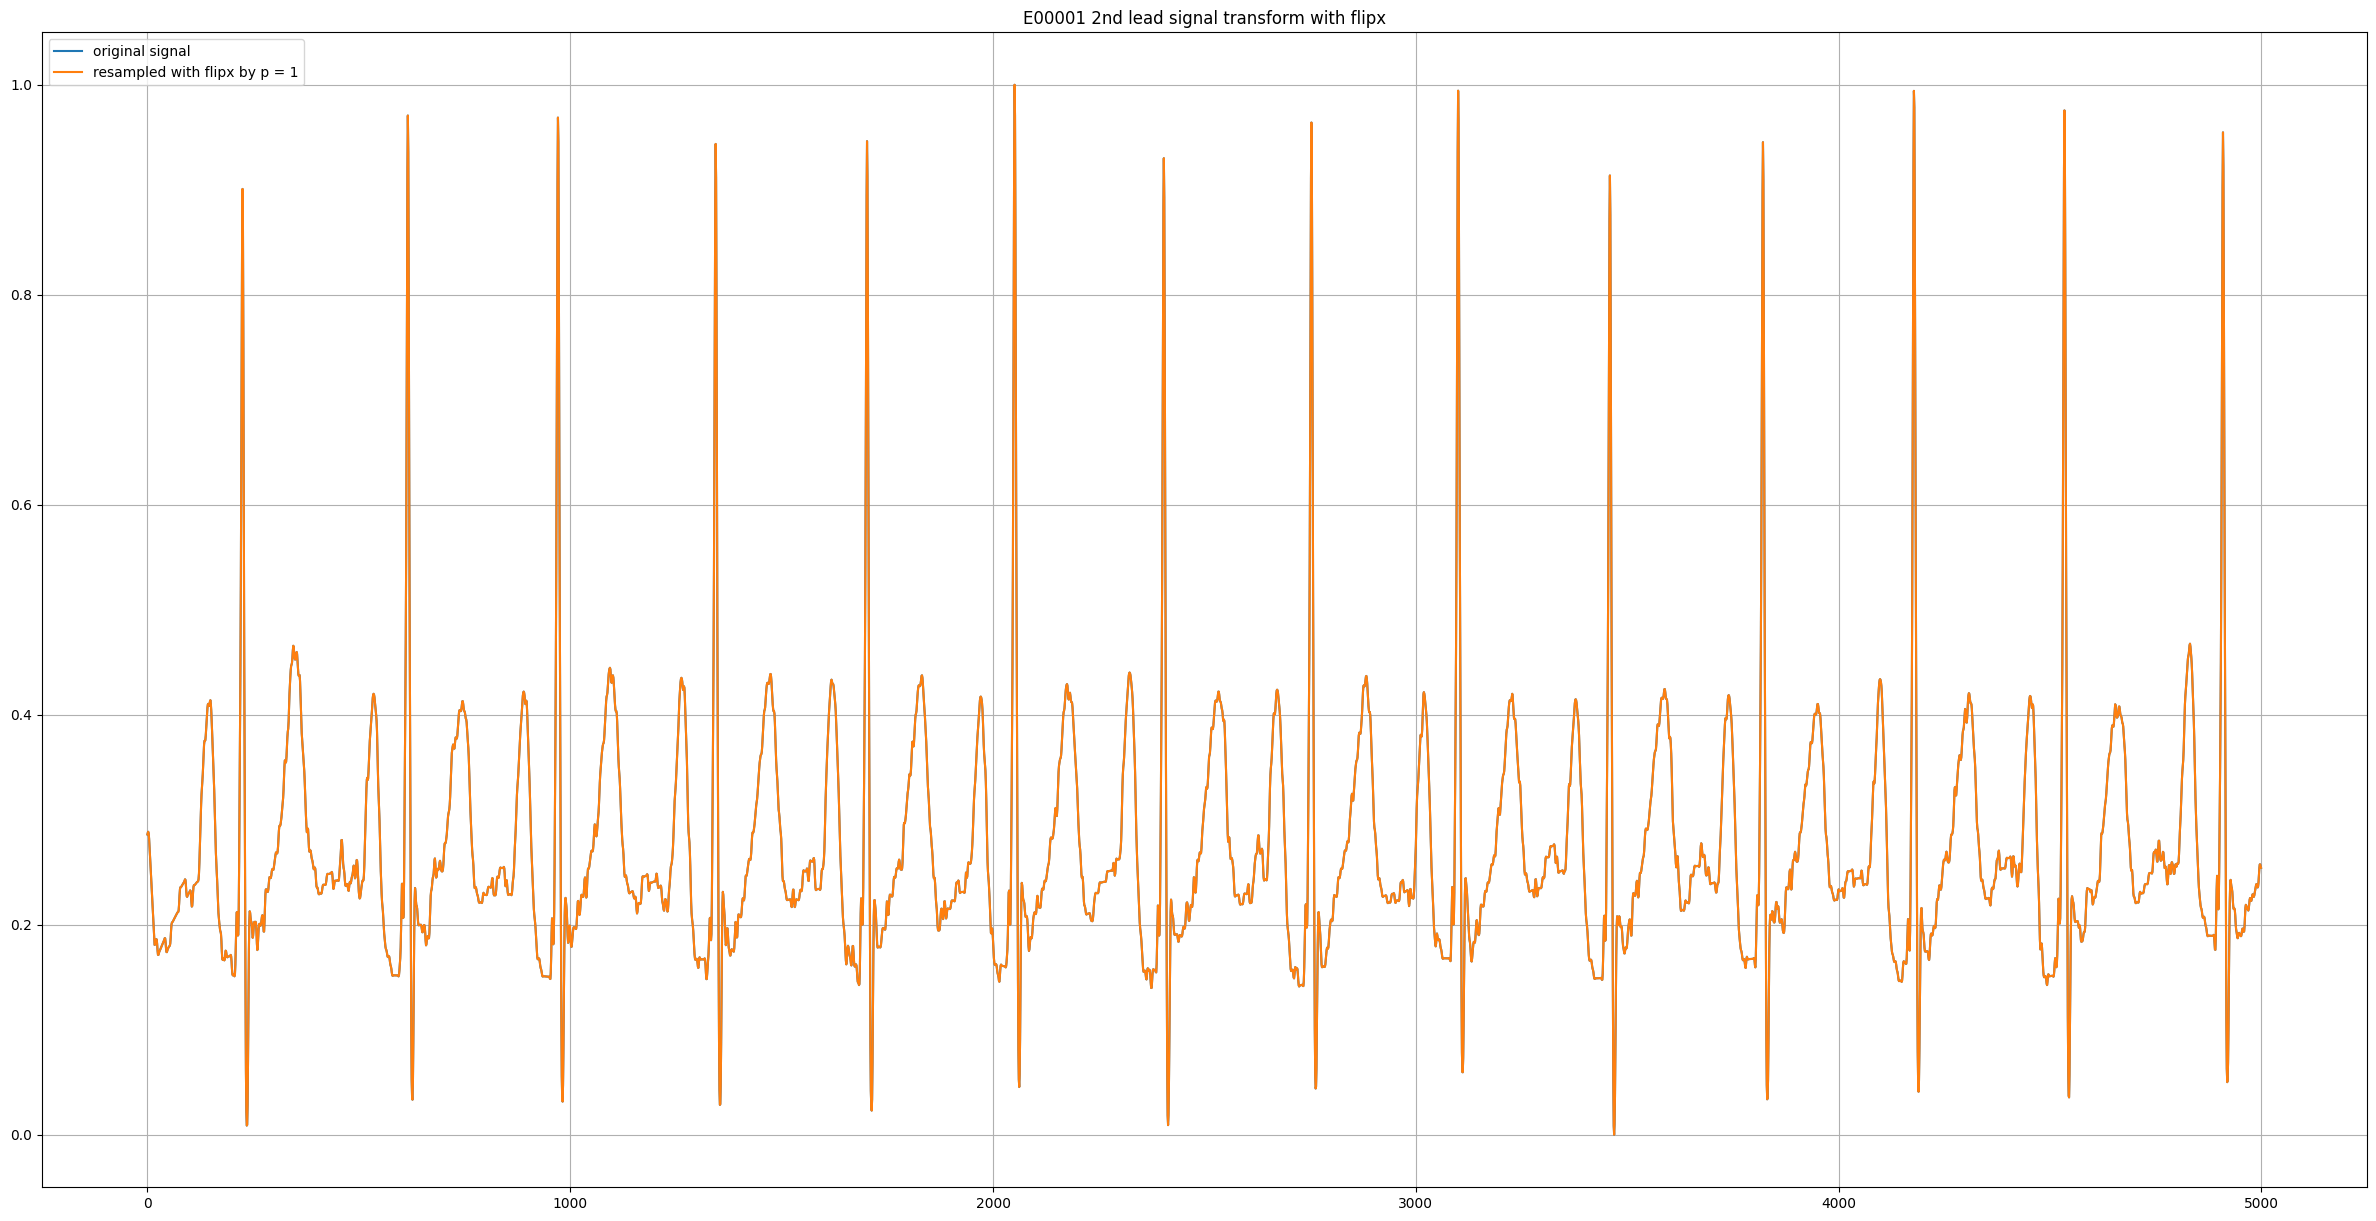

In [9]:
def Flipx(mseq, p):
    mseq=copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    mseq1 = np.fliplr(mseq)
    return mseq1

flipx_2 = Flipx(signal_1st, p = 1.0)

plt.figure(figsize=(30,15))
plt.plot(signal_1st) # Since the best P_value is 0, Flipy does not change the array. 
plt.plot(flipx_2)
plt.legend(("original signal", "resampled with flipx by p = 1",), loc='upper left')
plt.title("E00001 2nd lead signal transform with flipx")
plt.grid(True)
plt.show()

# NOTCH FILTER

 notch_filter is designed to apply a notch filter transformation to an input signal. The notch filter is used to suppress a specific frequency, which is typically a noise frequency, while preserving the rest of the signal's frequency components.  The primary purpose of this visualization is to illustrate how the signal's behavior changes when the notch filter transformation is applied, allowing for an examination of the effects of this transformation on the signal's frequency components and noise suppression.

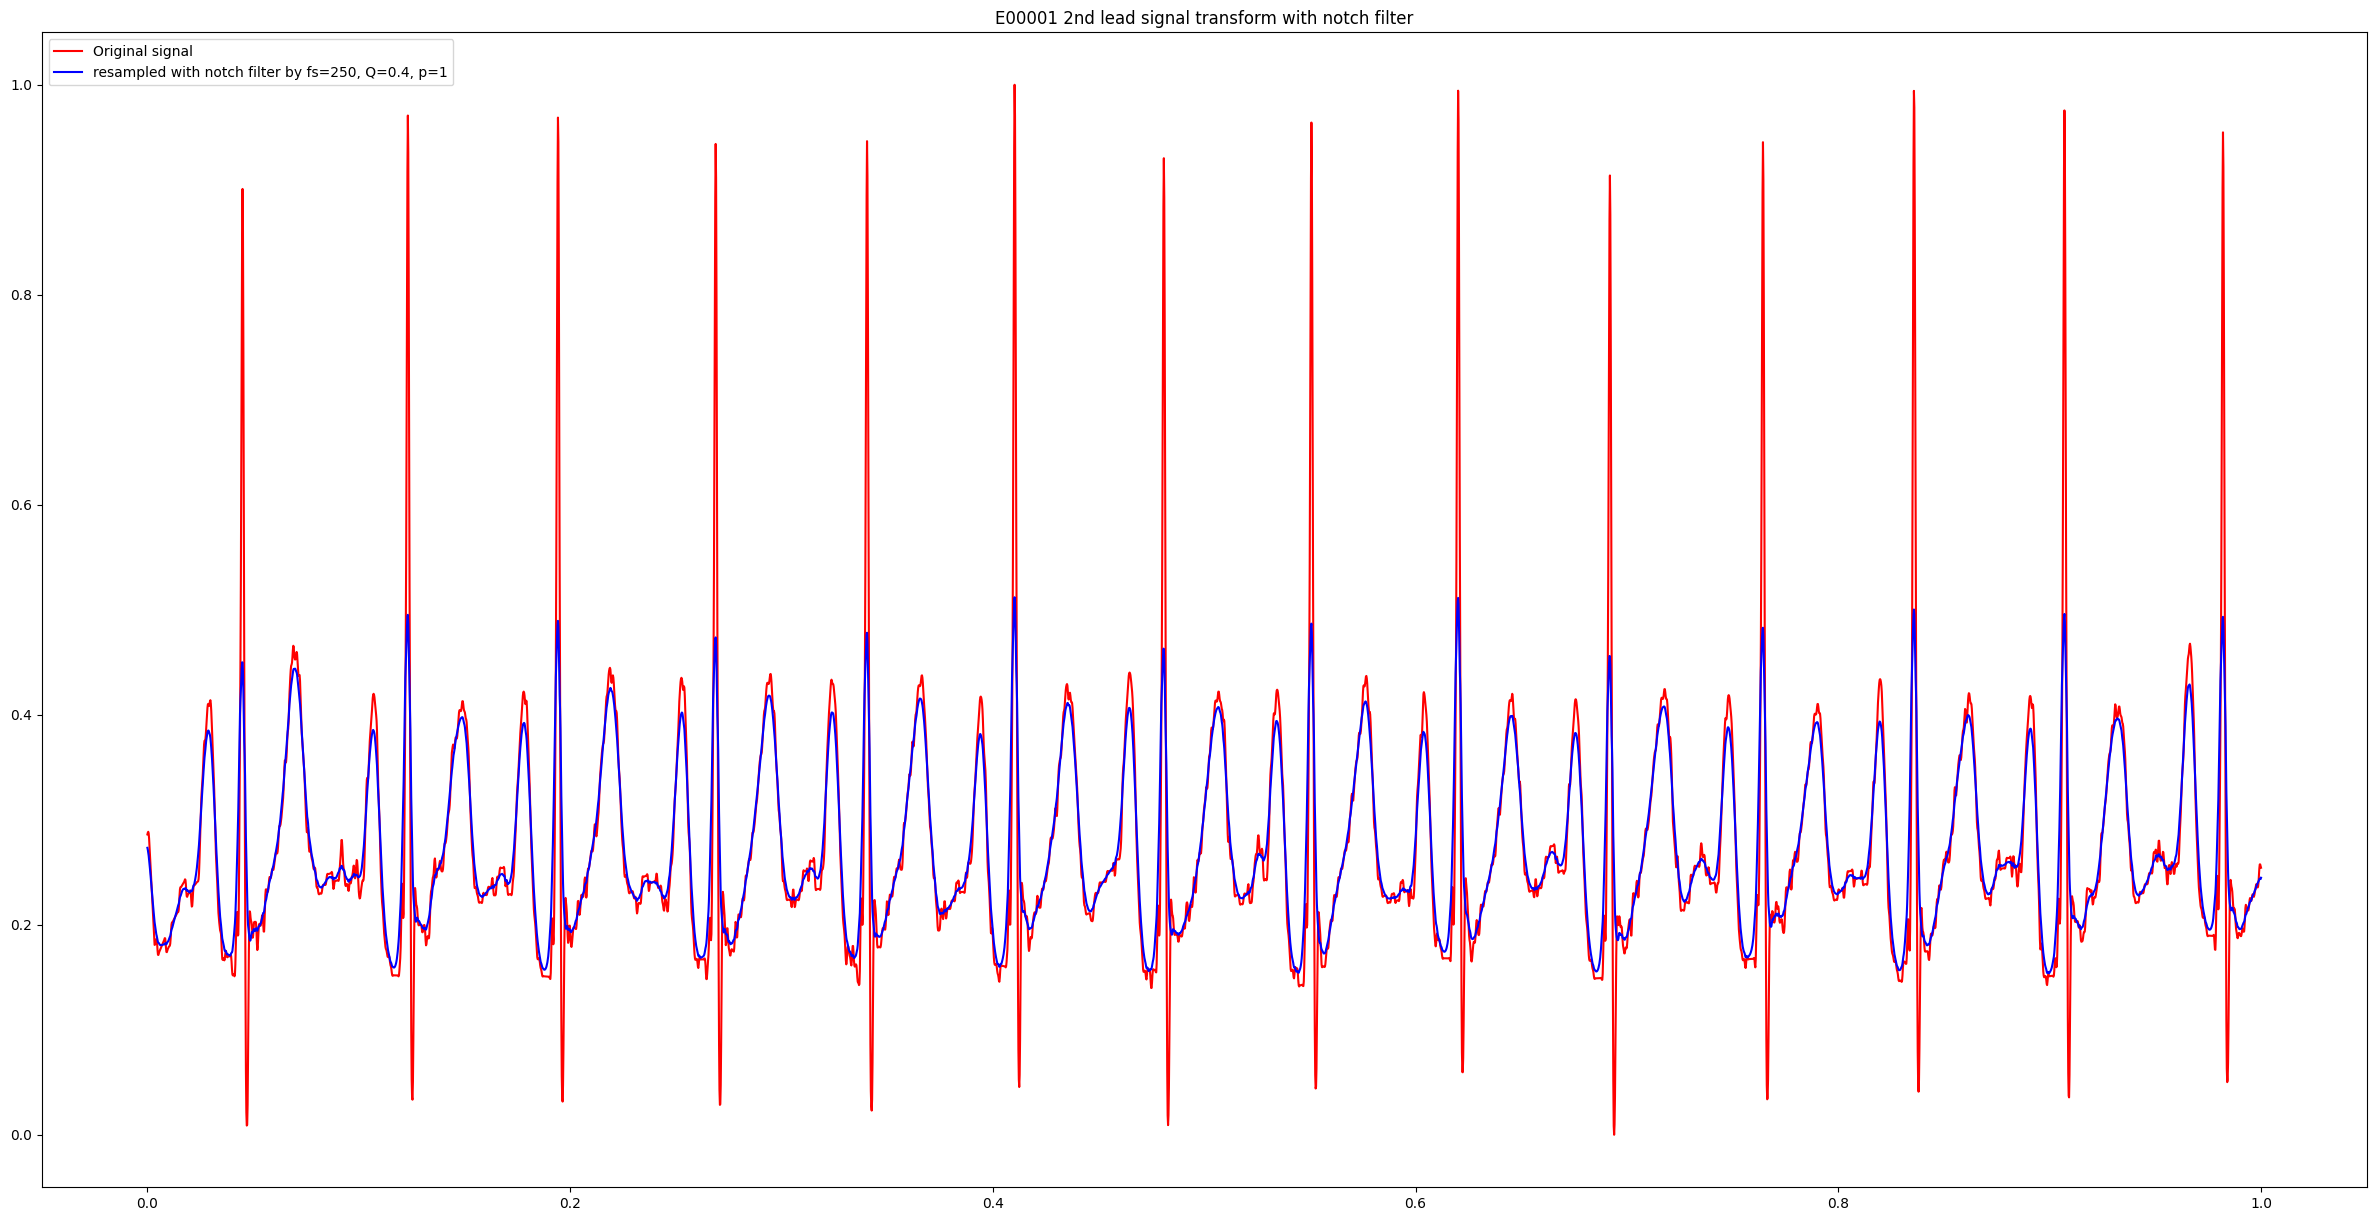

In [10]:
from scipy import signal
import copy
import numpy as np
import matplotlib.pyplot as plt

def notch_filter(fs, Q, p, mseq):
    np.random.seed(0)
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    f0 = 20
    b_notch, a_notch = signal.iirnotch(f0, Q, fs=fs)

    mseq = np.squeeze(mseq)
    mseq1 = signal.filtfilt(b_notch, a_notch, mseq, padlen=0)
    return mseq1


y_notched = notch_filter(fs=250, Q=0.4, p=1, mseq=signal_1st)

# create new figure with one subplot
fig, ax = plt.subplots(figsize=(30, 15))
t = np.linspace(0.0, 1, len(signal_1st))
# plot pure signal
ax.plot(t, signal_1st, color='r', label='Original signal')
# plot notch-filtered version of signal
ax.plot(t, y_notched, color='b', label='resampled with notch filter by fs=250, Q=0.4, p=1')
# add legend
ax.legend(loc='upper left')
ax.set_title('E00001 2nd lead signal transform with notch filter')

# display the plot
plt.show()


# MULTIPLY LINEAR

 multiply_linear is designed to perform a signal transformation involving linear multiplication. This transformation aims to modify the amplitude of the input signal while maintaining its linear relationship. Additionally, a normalized version of the transformed signal is plotted to show the amplitude scaling effect. The primary purpose of this visualization is to illustrate how the signal's behavior changes when the linear multiplication transformation is applied, offering insight into the effects of this transformation on the signal's amplitude and normalized representation.

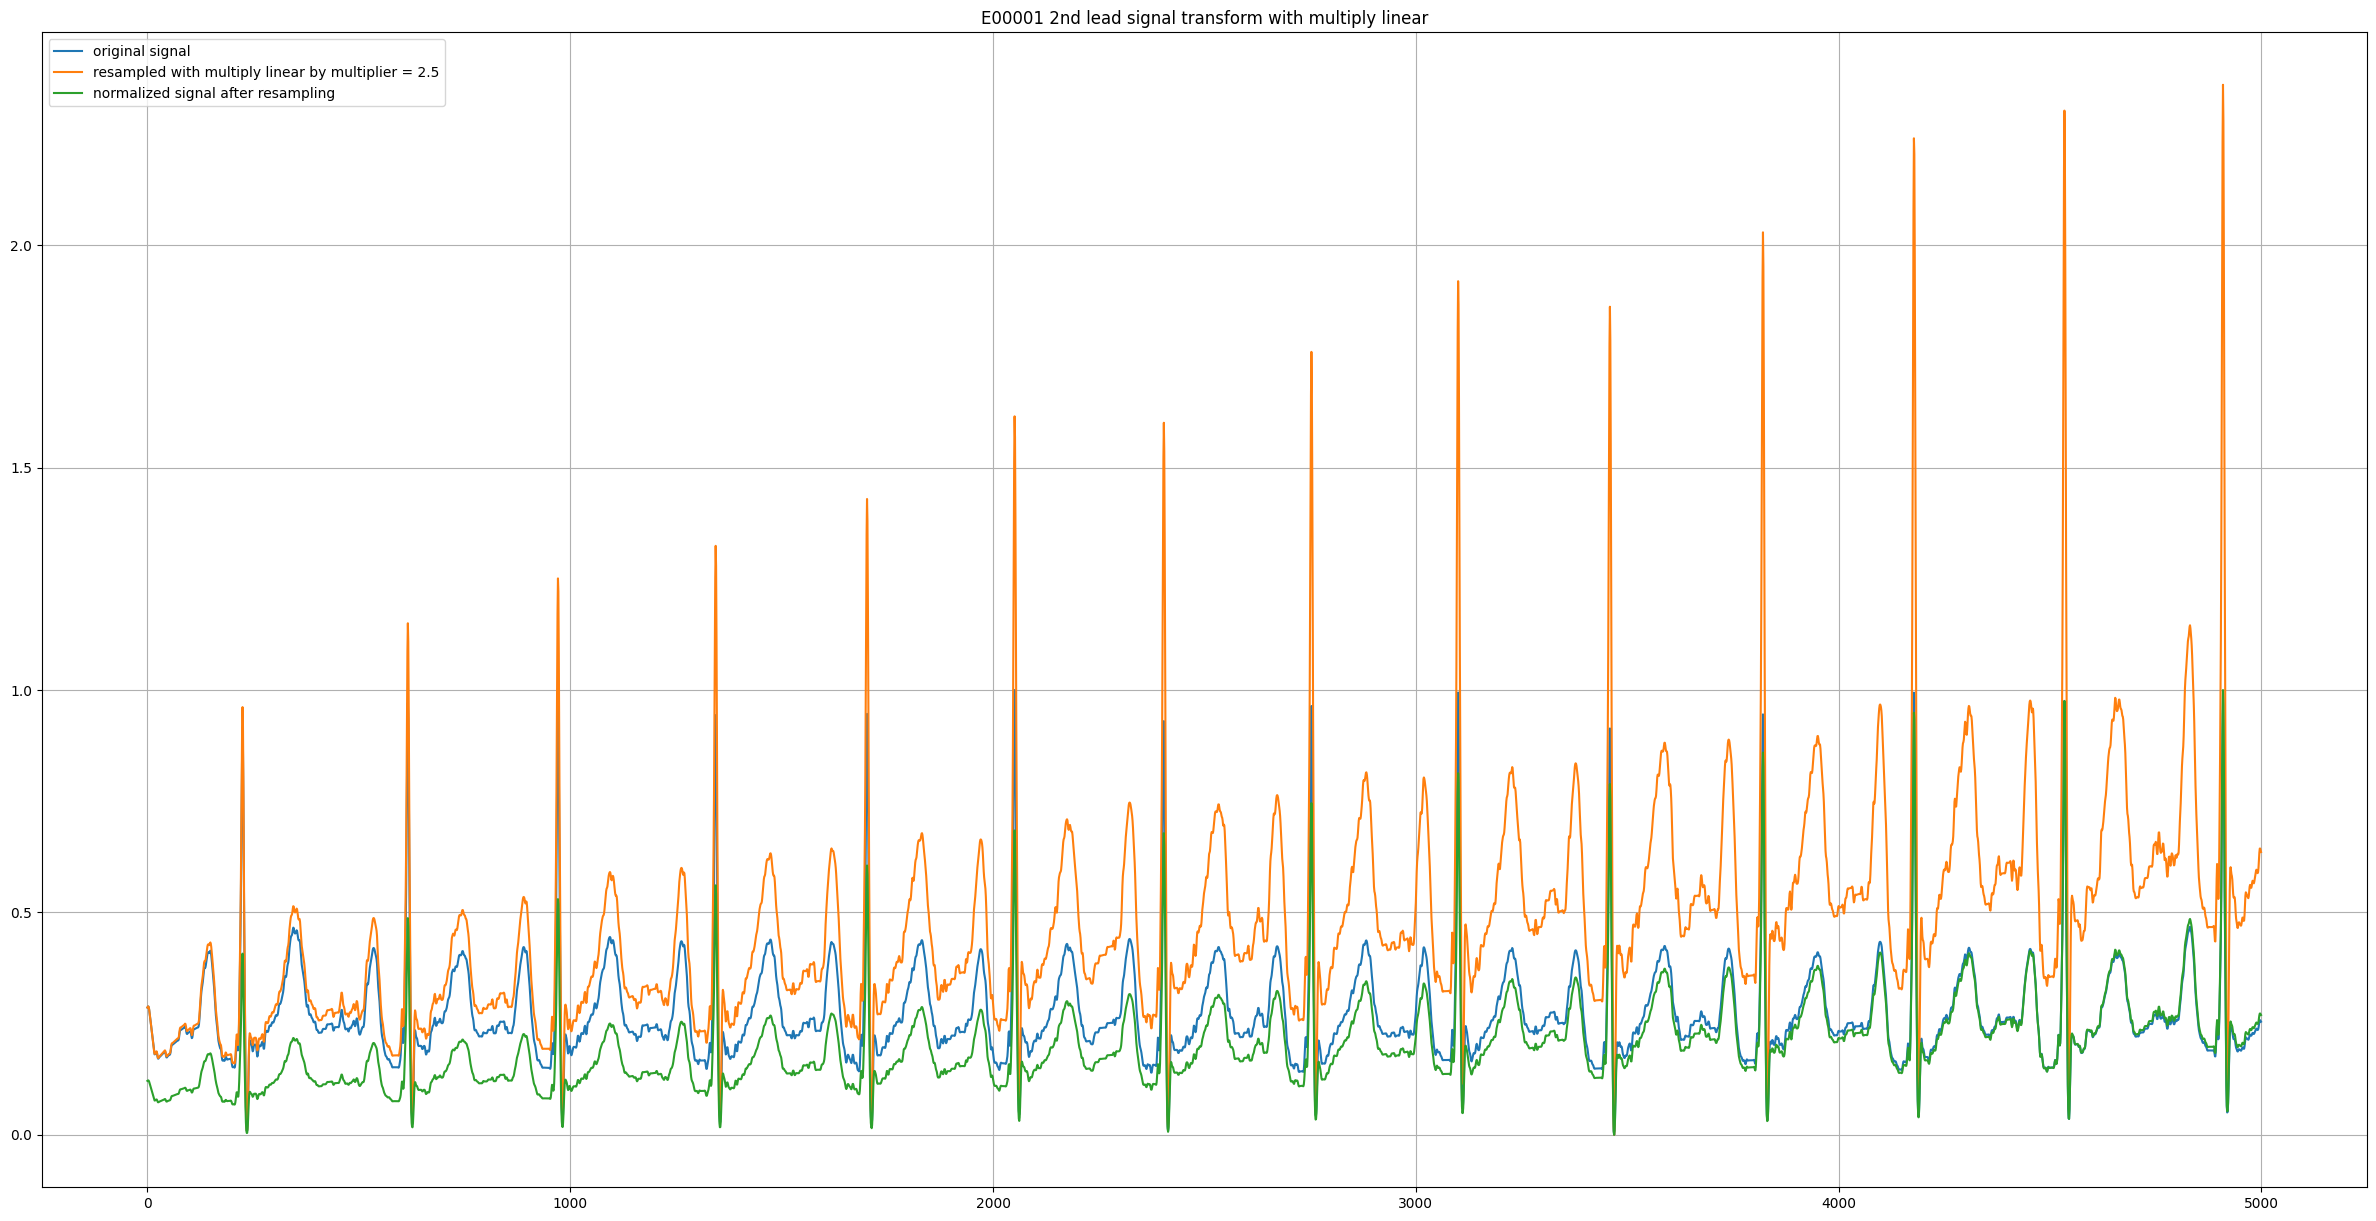

In [11]:
def multiply_linear(mseq, multiplier, p):
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    n = len(mseq)
    v = np.linspace(1, multiplier, n)
    mseq = np.squeeze(mseq)
    mseq = np.multiply(mseq, v)
    return mseq

ml =  multiply_linear(signal_1st, multiplier = 2.5, p = 1)
normalized_ml = (ml - np.min(ml)) / (np.max(ml) - np.min(ml))

plt.figure(figsize=(30,15))
plt.plot(signal_1st) 
plt.plot(ml)
plt.plot(normalized_ml)
plt.legend(("original signal", "resampled with multiply linear by multiplier = 2.5", "normalized signal after resampling",), loc='upper left')
plt.title("E00001 2nd lead signal transform with multiply linear")
plt.grid(True)
plt.show()

# MULTIPLY TRIANGLE

 multiply_triangle is designed to perform a signal transformation that involves multiplying the input signal with a triangular-shaped amplitude envelope.  This transformation aims to modify the signal's amplitude while incorporating a gradual increase and decrease in amplitude across the signal's length. The primary purpose of this visualization is to illustrate how the signal's behavior changes when the triangular multiplication transformation is applied, providing insight into the effects of this transformation on the signal's amplitude and shape.

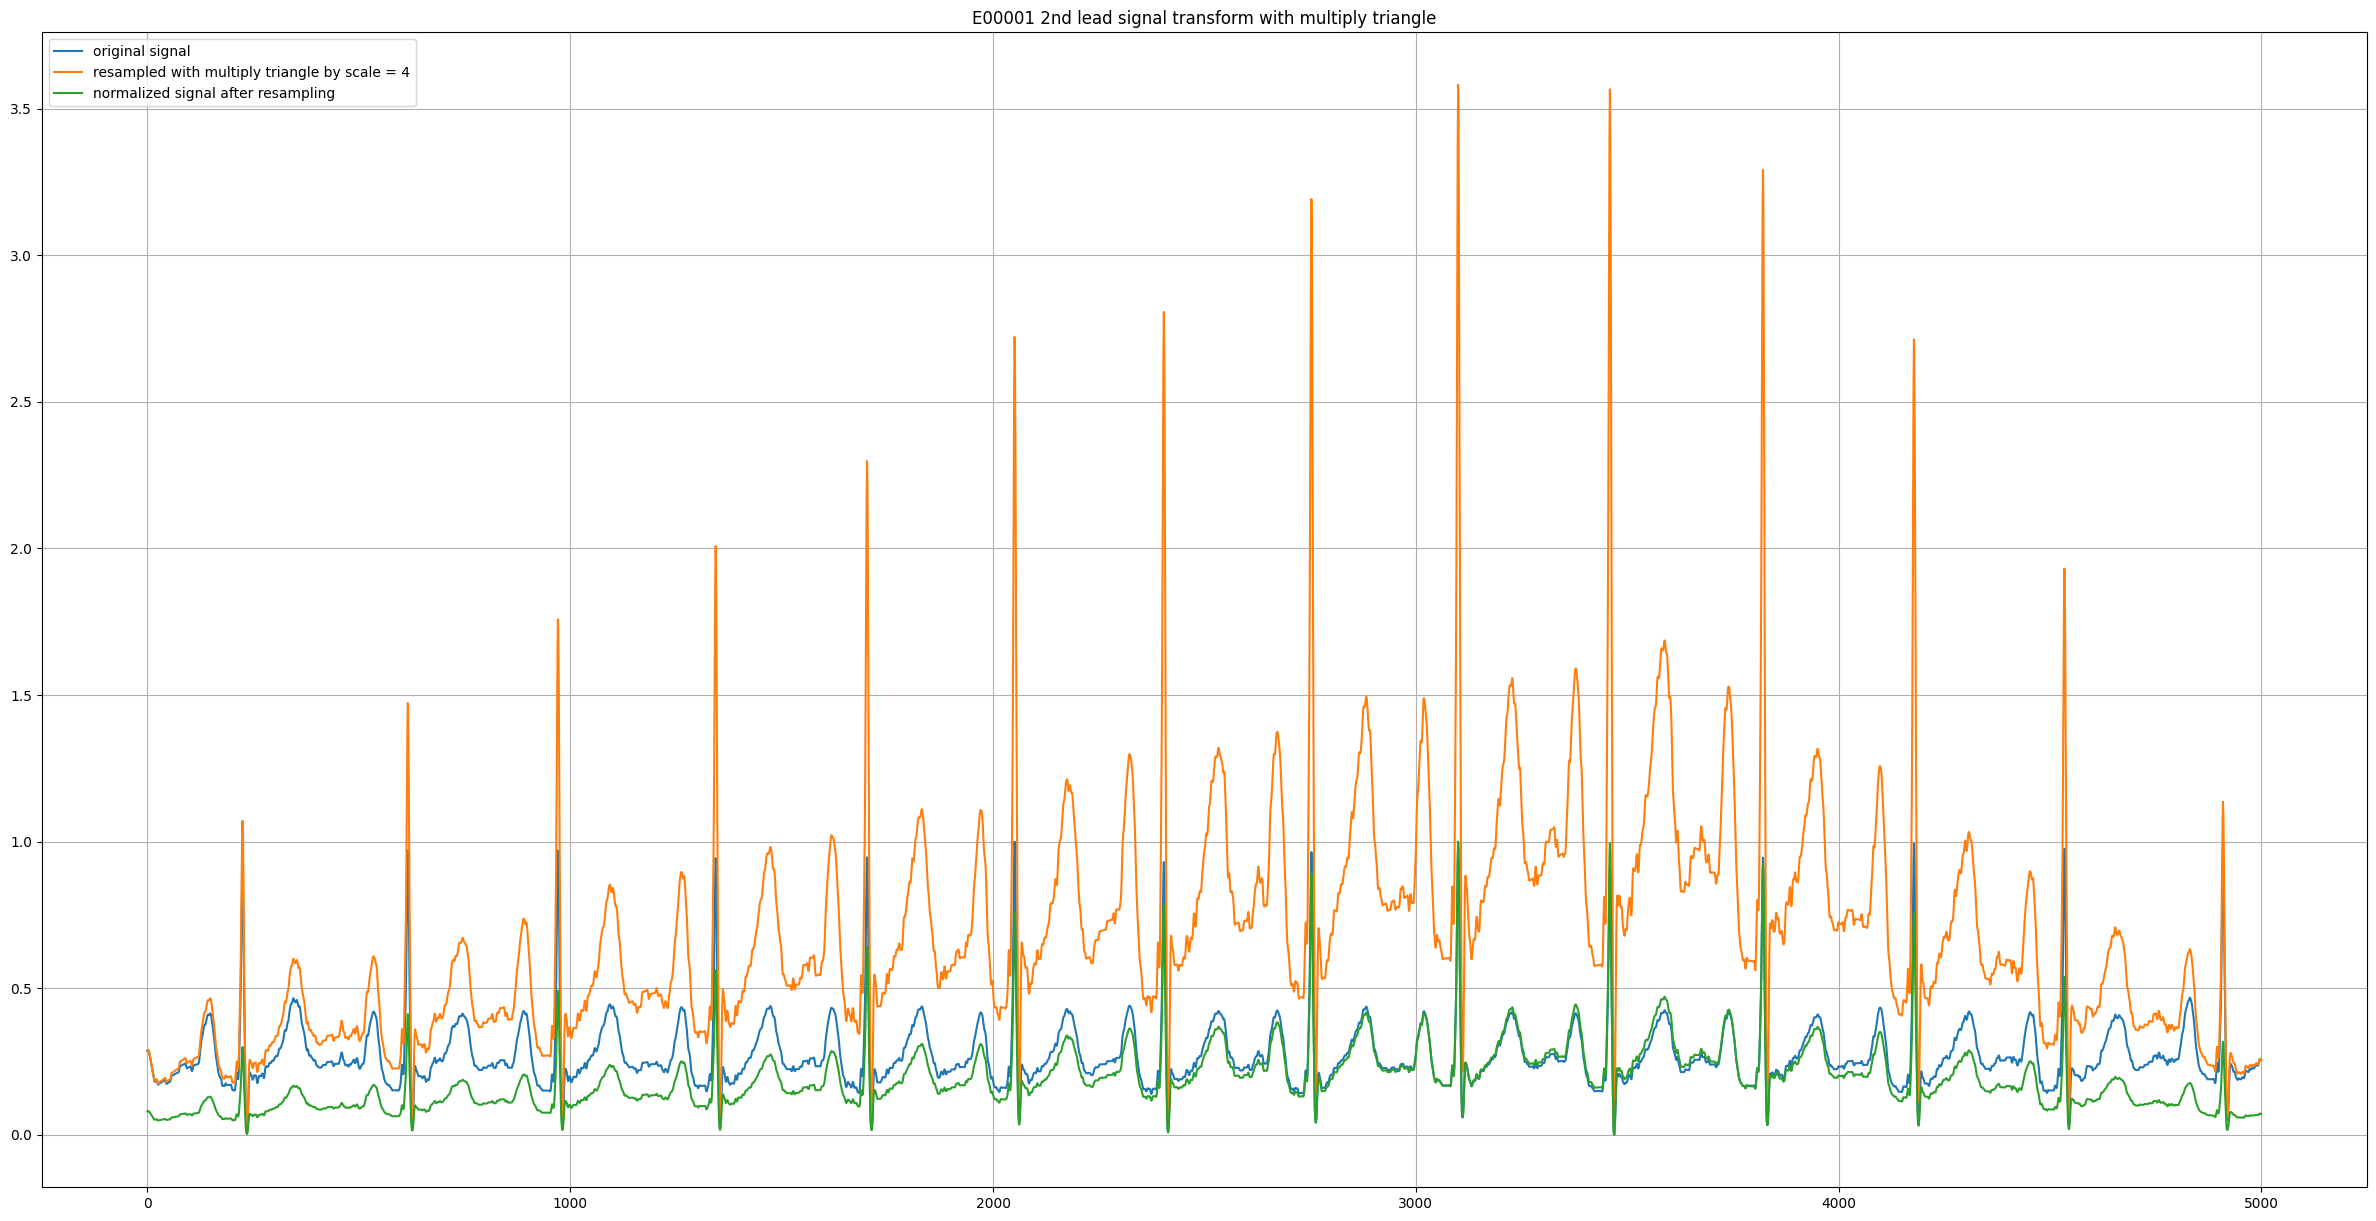

In [12]:
import numpy as np
import copy

def multiply_triangle(mseq, scale, p):
    np.random.seed(0)
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    n_samples = len(mseq)
    #n_turning_point = int(n_samples/2)
    n_turning_point = int(np.random.uniform(0,1)*n_samples)
    m = scale
    #m = np.random.uniform(1/scale, scale)
    v1 = np.linspace(1,m,n_turning_point)
    v2 = np.linspace(m,1,n_samples - n_turning_point)
    v = np.concatenate([v1,v2])
    mseq = np.squeeze(mseq)
    mseq = np.multiply(mseq, v)
    return mseq

mtr = multiply_triangle(signal_1st, scale = 4, p = 1)
normalized_mtr = (mtr - np.min(mtr)) / (np.max(mtr) - np.min(mtr))

plt.figure(figsize=(30,15))
plt.plot(signal_1st) # Since the best P_value is 0, Flipy does not change the array. 
plt.plot(mtr)
plt.plot(normalized_mtr)
plt.legend(("original signal",  "resampled with multiply triangle by scale = 4", "normalized signal after resampling",), loc='upper left')
plt.title("E00001 2nd lead signal transform with multiply triangle")
plt.grid(True)
plt.show()

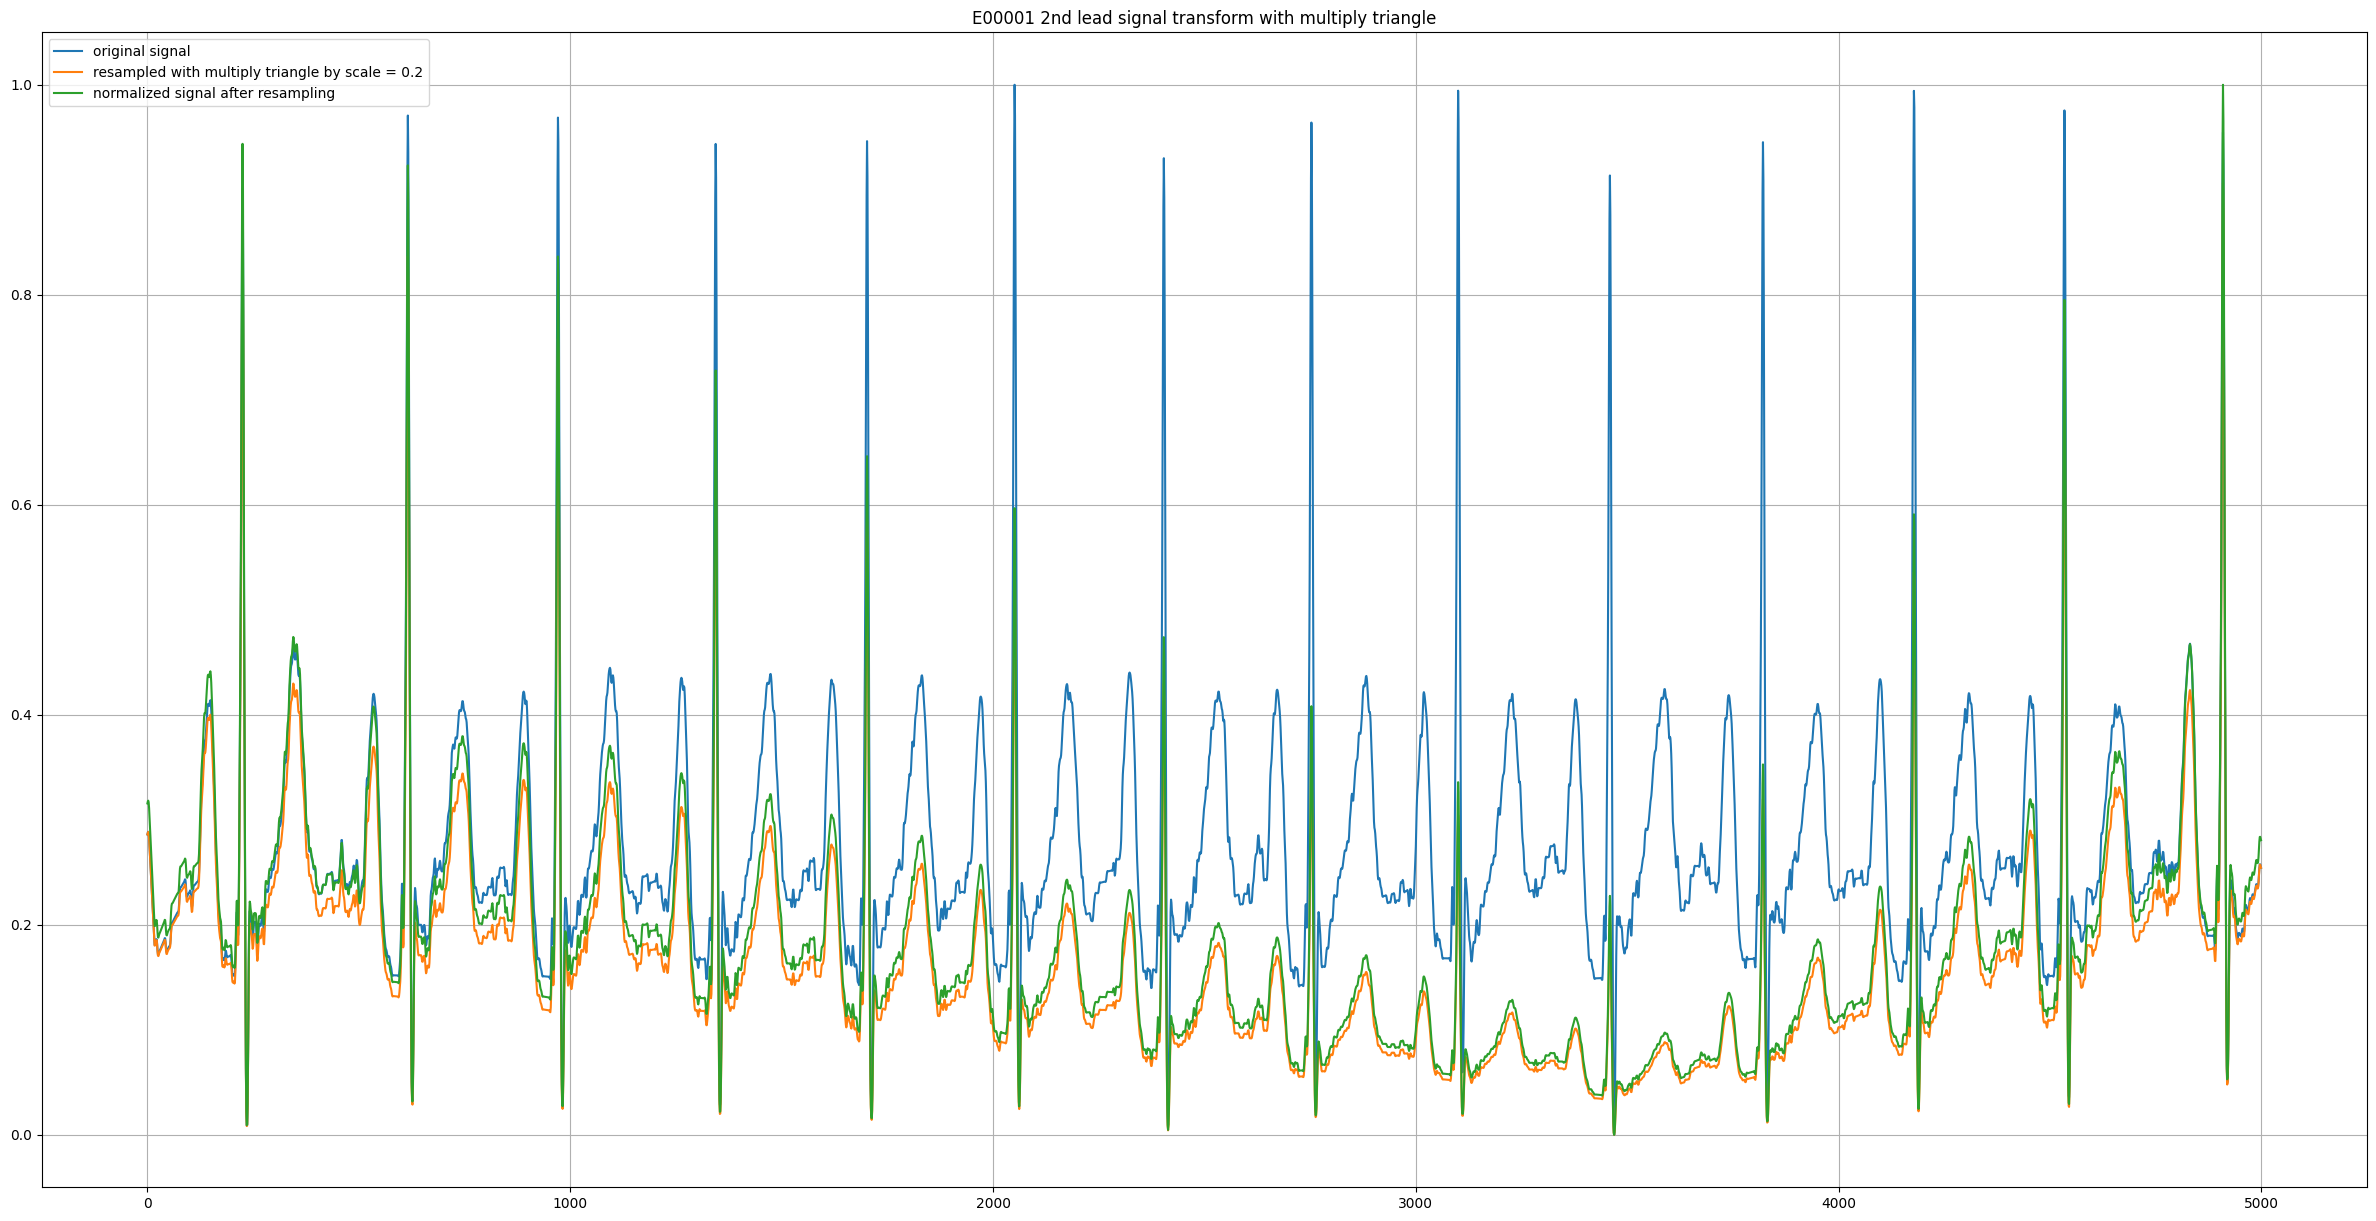

In [13]:
mtrr = multiply_triangle(signal_1st, scale = 0.2, p = 1)
normalized_mtrr = (mtrr - np.min(mtrr)) / (np.max(mtrr) - np.min(mtrr))

plt.figure(figsize=(30,15))
plt.plot(signal_1st) # Since the best P_value is 0, Flipy does not change the array. 
plt.plot(mtrr)
plt.plot(normalized_mtrr)
plt.legend(("original signal",  "resampled with multiply triangle by scale = 0.2", "normalized signal after resampling"), loc='upper left')
plt.title("E00001 2nd lead signal transform with multiply triangle")
plt.grid(True)
plt.show()

# RANDOM STRECH

 multiply_triangle is designed to perform a signal transformation that involves multiplying the input signal with a triangular-shaped amplitude envelope. This transformation aims to modify the signal's amplitude while incorporating a gradual increase and decrease in amplitude across the signal's length. Additionally, a normalized version of the transformed signal is plotted to show the amplitude scaling effect. The primary purpose of this visualization is to illustrate how the signal's behavior changes when the triangular multiplication transformation is applied, providing insight into the effects of this transformation on the signal's amplitude and shape.

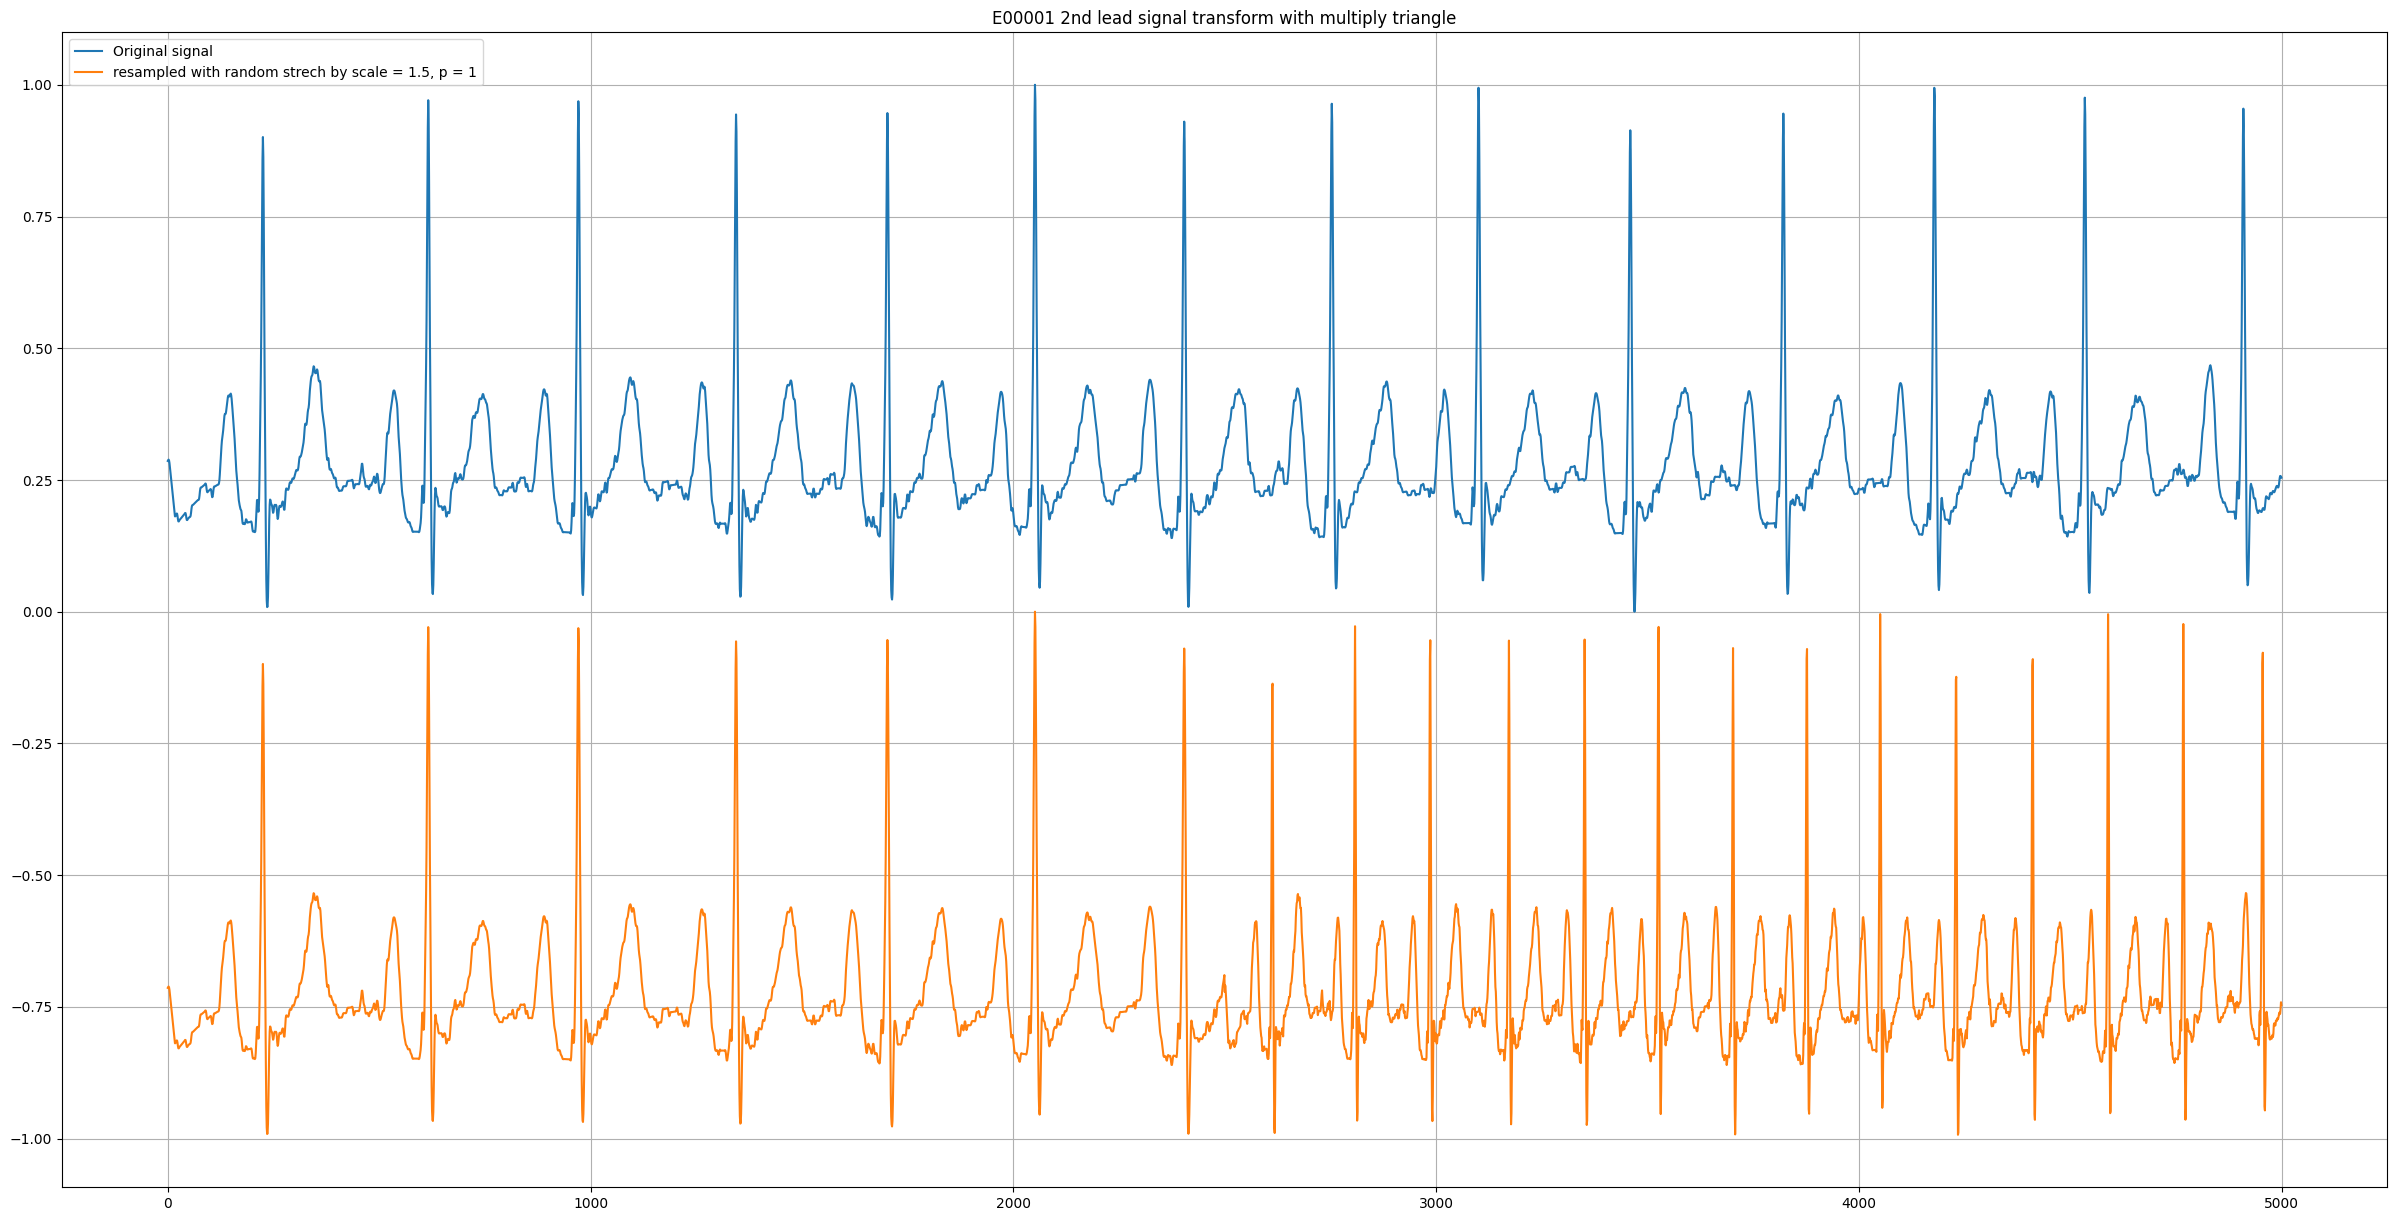

In [14]:
def random_stretch(mseq, scale, p):
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    m = scale
    num = int(len(mseq) * m)
    y = signal.resample(mseq, num)
    y = np.squeeze(y)
    mseq = np.squeeze(mseq)
    if len(y) < len(mseq):
        mseq[len(y):] = y
    else:
        mseq = y[:len(mseq)]
    return mseq

rs_1 = random_stretch(signal_1st, scale = 0.5, p = 1)

plt.figure(figsize=(30,15))
plt.plot(signal_1st) # Since the best P_value is 0, Flipy does not change the array. 
plt.plot((rs_1)-1)
plt.legend(("Original signal", "resampled with random strech by scale = 1.5, p = 1",), loc='upper left')
plt.title("E00001 2nd lead signal transform with multiply triangle")
plt.grid(True)
plt.show()

# RESAMPLE SINE

 resample_sine is designed to perform a signal transformation that involves resampling the input signal using sine-based temporal scaling. This transformation aims to change the signal's temporal behavior by introducing sinusoidal variations in the sampling positions. The main purpose of this visualization is to illustrate how the signal's temporal behavior changes when the resample sine transformation is applied, providing insight into the effects of this transformation on the signal's time-based characteristics and frequency content.

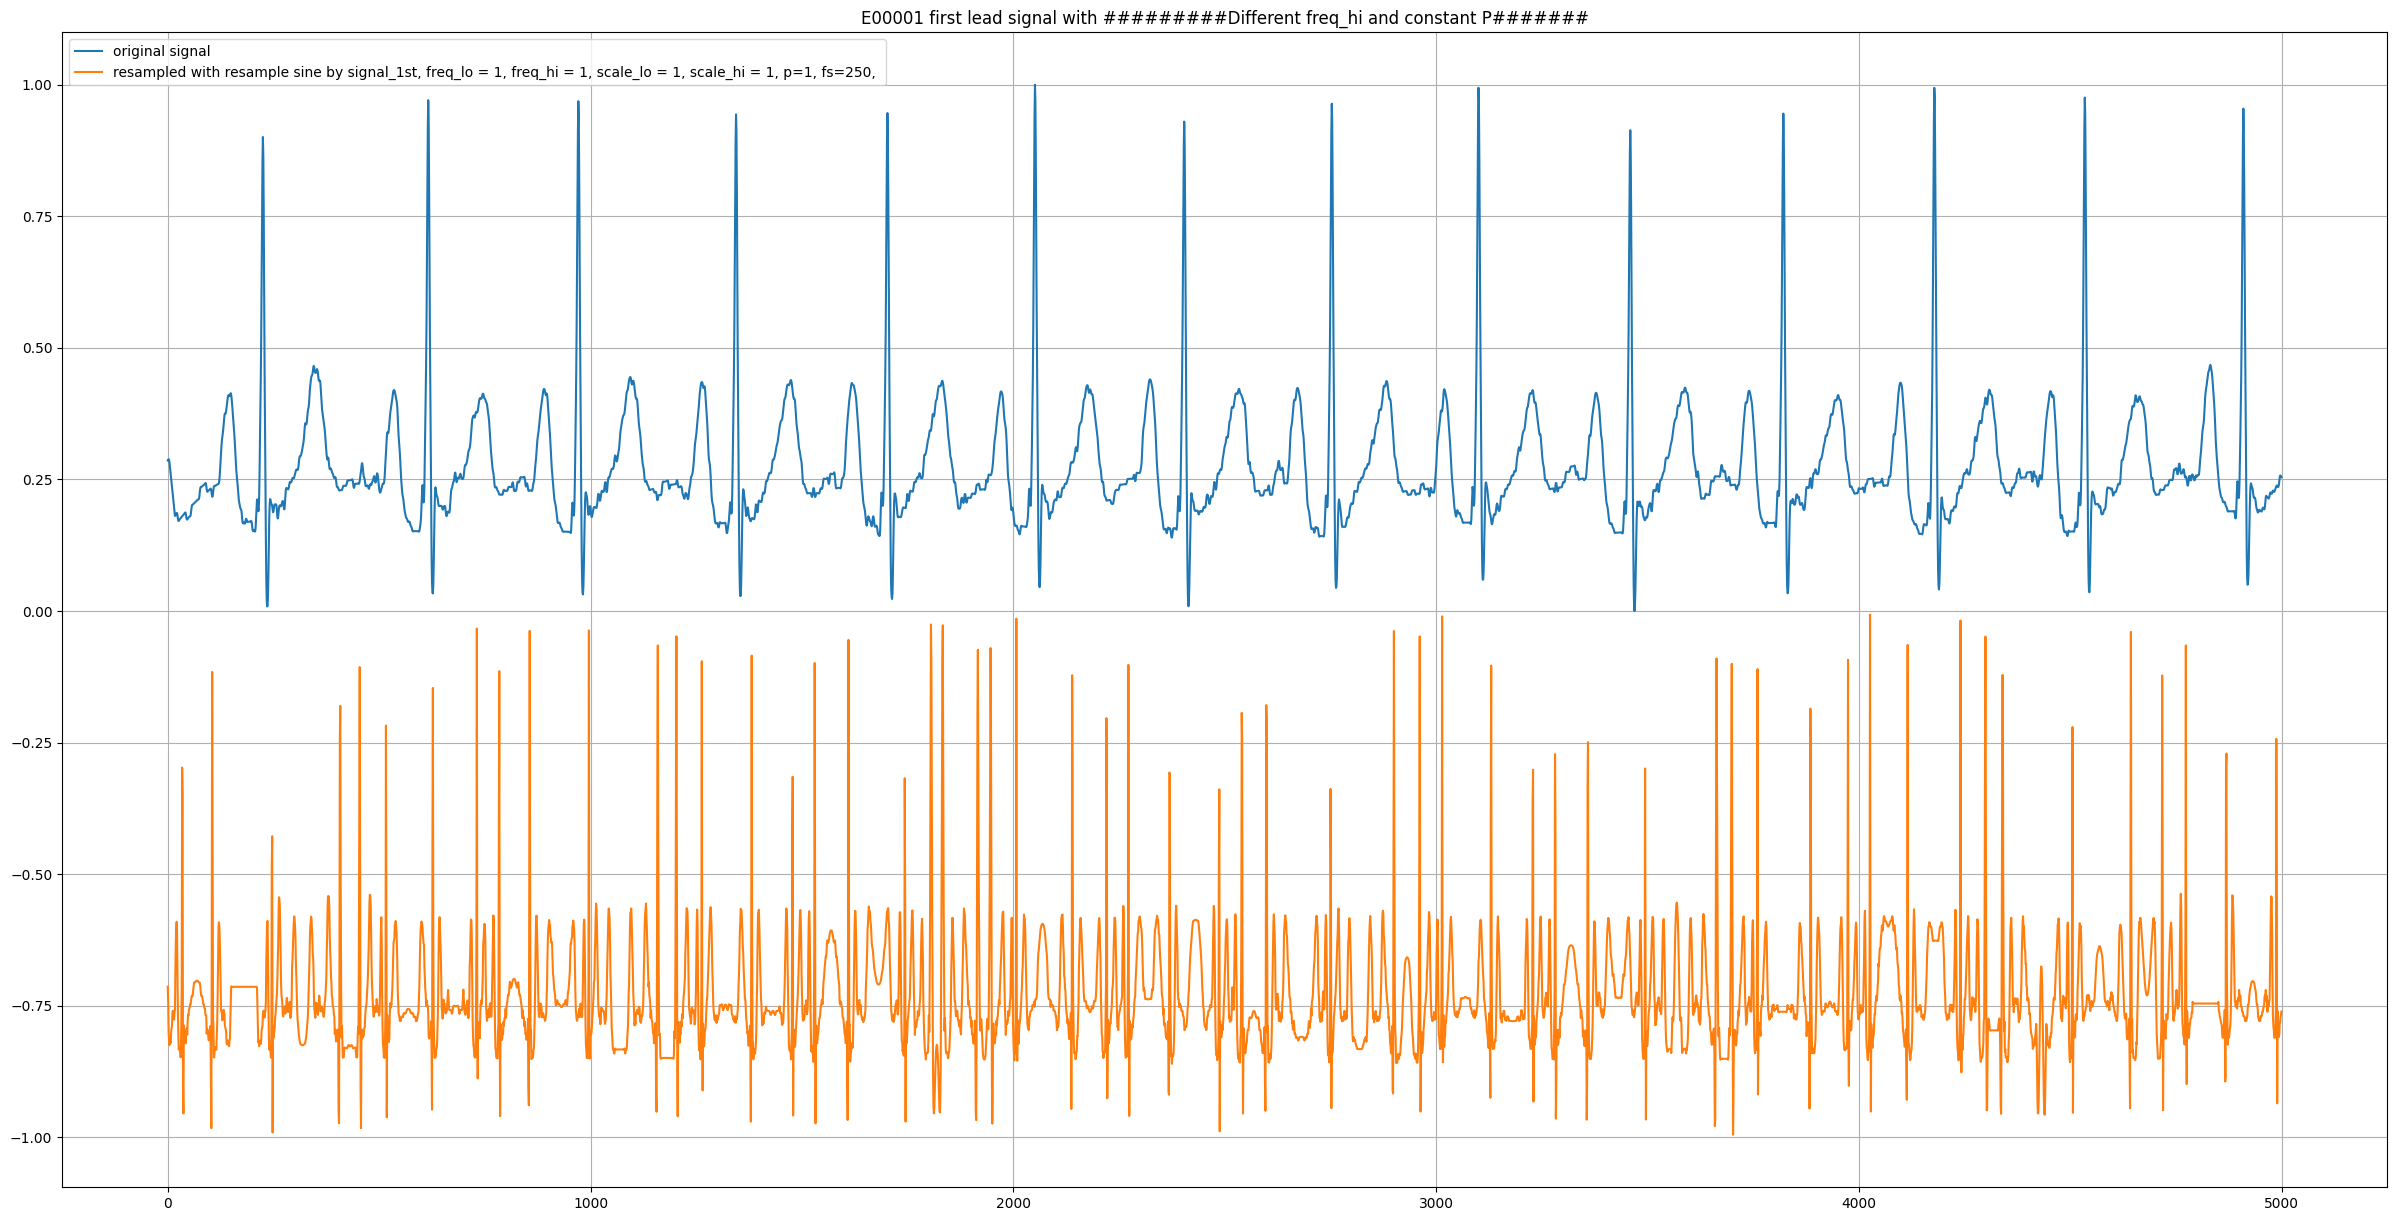

In [15]:
def resample_sine(mseq, freq_lo, freq_hi, scale_lo, scale_hi, p, fs=250):
    mseq = copy.deepcopy(mseq)
    np.random.seed(0)
    if p < np.random.rand(1):
        return mseq
    np.random.seed(0)
    scale1 = np.random.uniform(scale_lo, scale_hi)
    freq = np.random.uniform(freq_lo, freq_hi)
    x_orig = np.arange(0, len(mseq))/fs
    x_new = x_orig + scale1*np.sin(2*np.pi*freq*x_orig)
    mseq1 = np.squeeze(mseq)
    mseq2 = np.interp(x_new, x_orig, mseq1)
    return mseq2

res_21 = resample_sine(signal_1st, freq_lo = 1, freq_hi = 1, scale_lo = 1, scale_hi = 1, p=1, fs=250)

plt.figure(figsize=(30,15))
plt.plot(signal_1st)
plt.plot(res_21-1)
plt.legend(("original signal", "resampled with resample sine by signal_1st, freq_lo = 1, freq_hi = 1, scale_lo = 1, scale_hi = 1, p=1, fs=250, ",), loc='upper left')
plt.title("E00001 first lead signal with #########Different freq_hi and constant P#######")
plt.grid(True)
plt.show()

# RESAMPLE UNIFORM

 resample_uniform is designed to perform a signal transformation that involves uniform resampling of the input signal. The primary goal of this visualization is to illustrate how the signal's length changes when the uniform resampling transformation is applied, providing insight into the effects of this transformation on the signal's temporal resolution and characteristics.

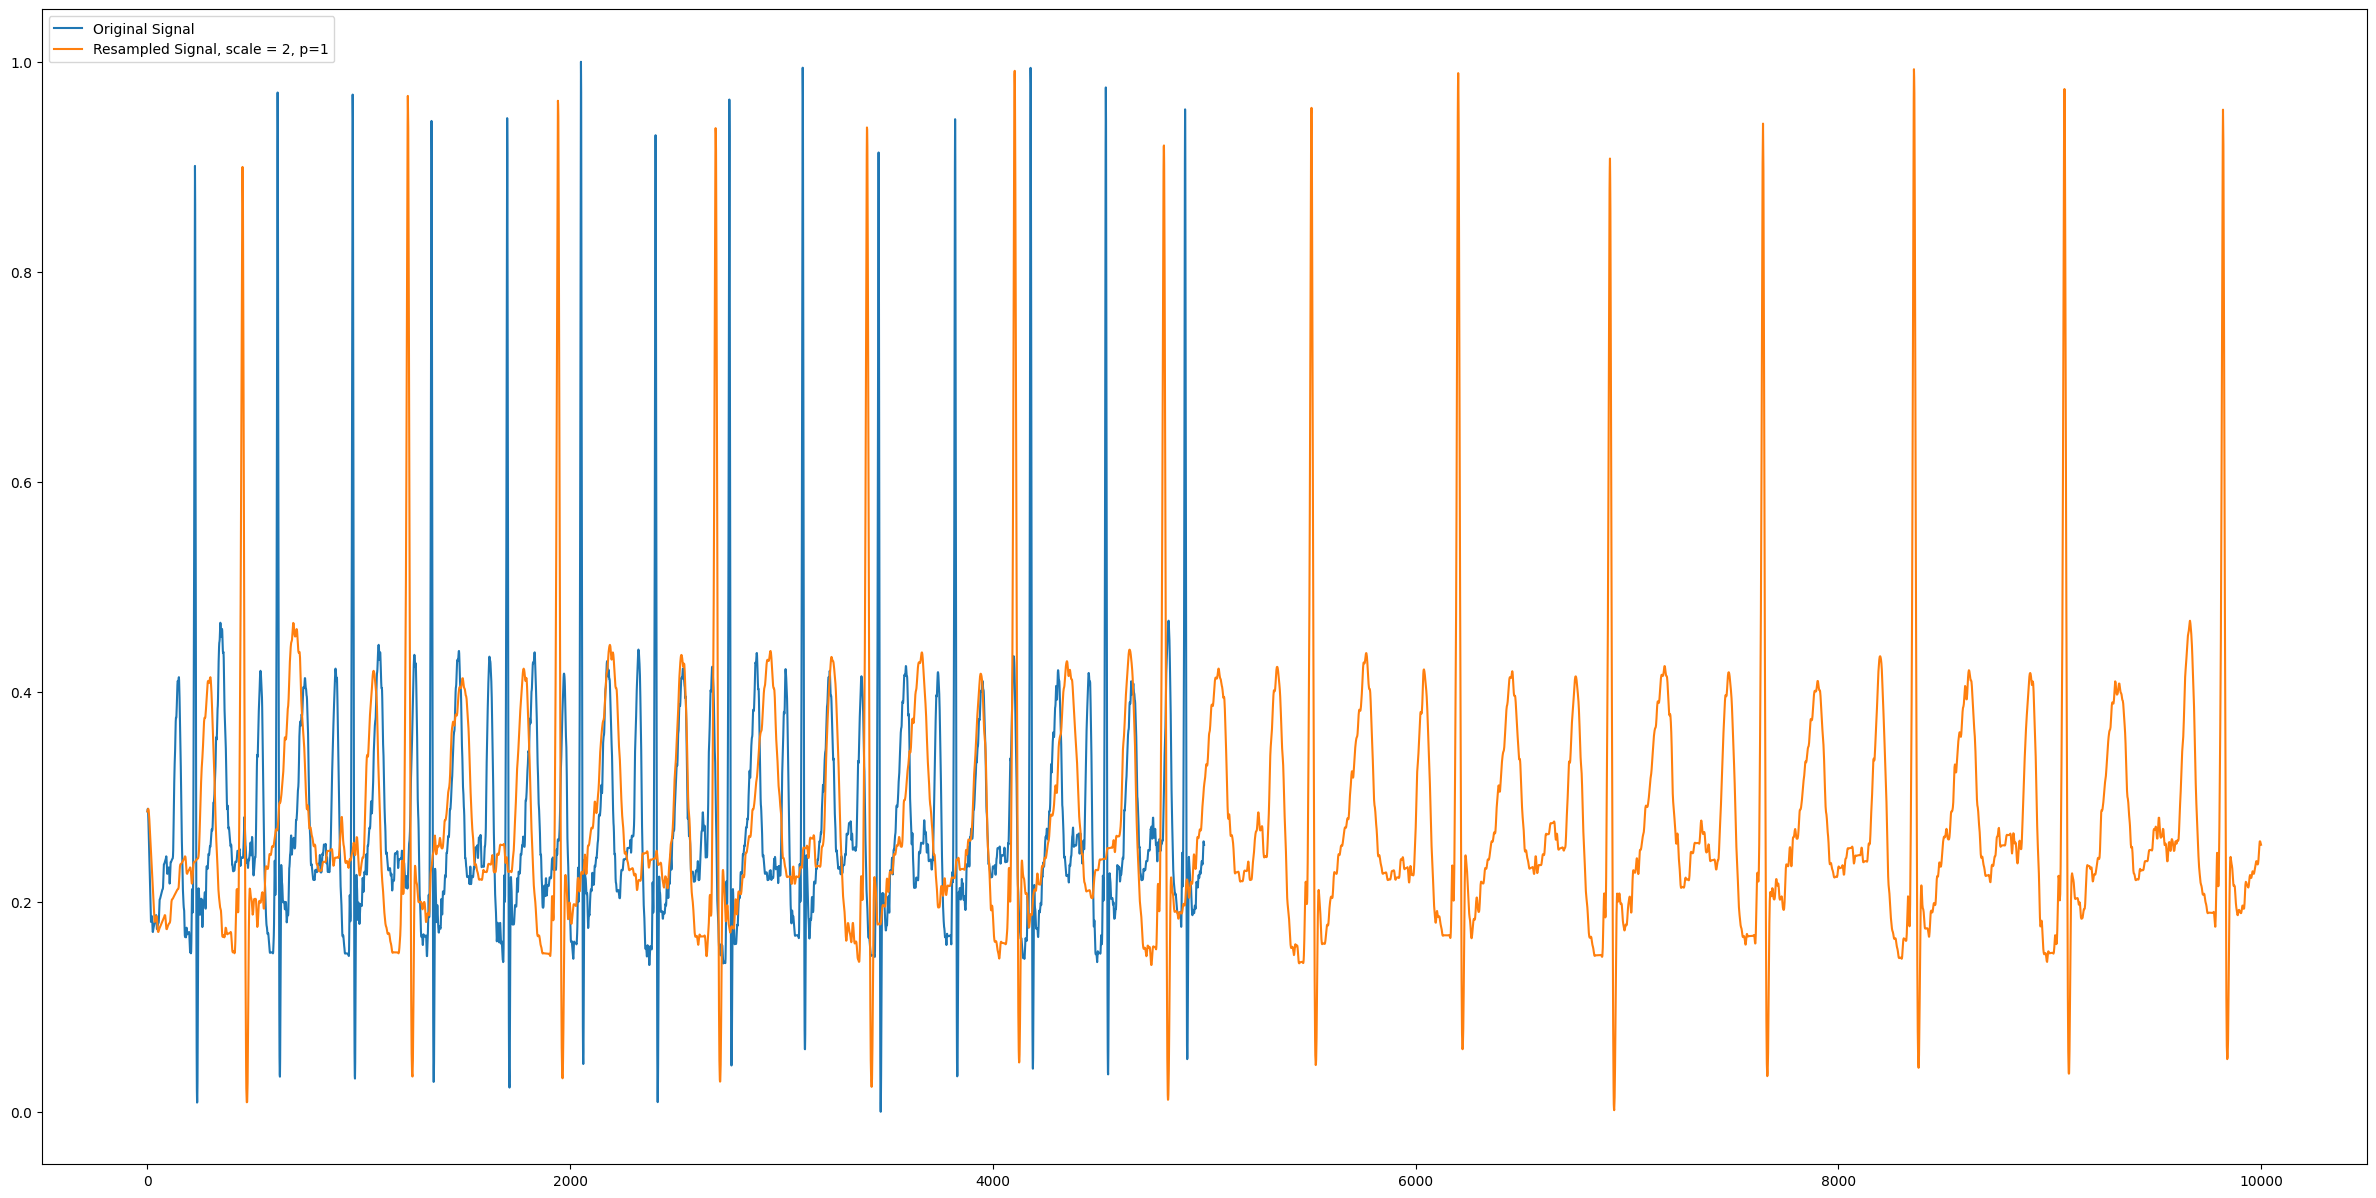

In [16]:
def resample_uniform(mseq, scale, p):
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    original_length = len(mseq)
    new_length = int(original_length * scale)
    x_orig = np.linspace(0, original_length-1, original_length)
    x_new = np.linspace(0, original_length-1, new_length)
    interpolator = interpolate.interp1d(x_orig, mseq)
    signal_resampled = interpolator(x_new)
    return signal_resampled

signal_1st = np.reshape(signal_1st,(5000,))
signal_uniform_2 = resample_uniform(signal_1st, scale = 2, p=1 )

# Plot the original and resampled signals
plt.figure(figsize = (30,15))
plt.plot(signal_1st, label='Original Signal')
plt.plot(signal_uniform_2, label='Resampled Signal, scale = 2, p=1')
plt.legend(loc = 'upper left')
plt.show()

# RESAMPLE LINEAR ALIGN 1ST PEAK

 resample_linear_align_1stpeak is designed to perform a signal transformation that involves linear resampling while aligning the first peak of the resampled signal with the first peak of the original signal. This transformation aims to modify the signal's duration while maintaining the alignment of its prominent features. The main purpose of this visualization is to illustrate how the signal's duration changes while preserving the alignment of the first peak when the linear resampling transformation is applied.

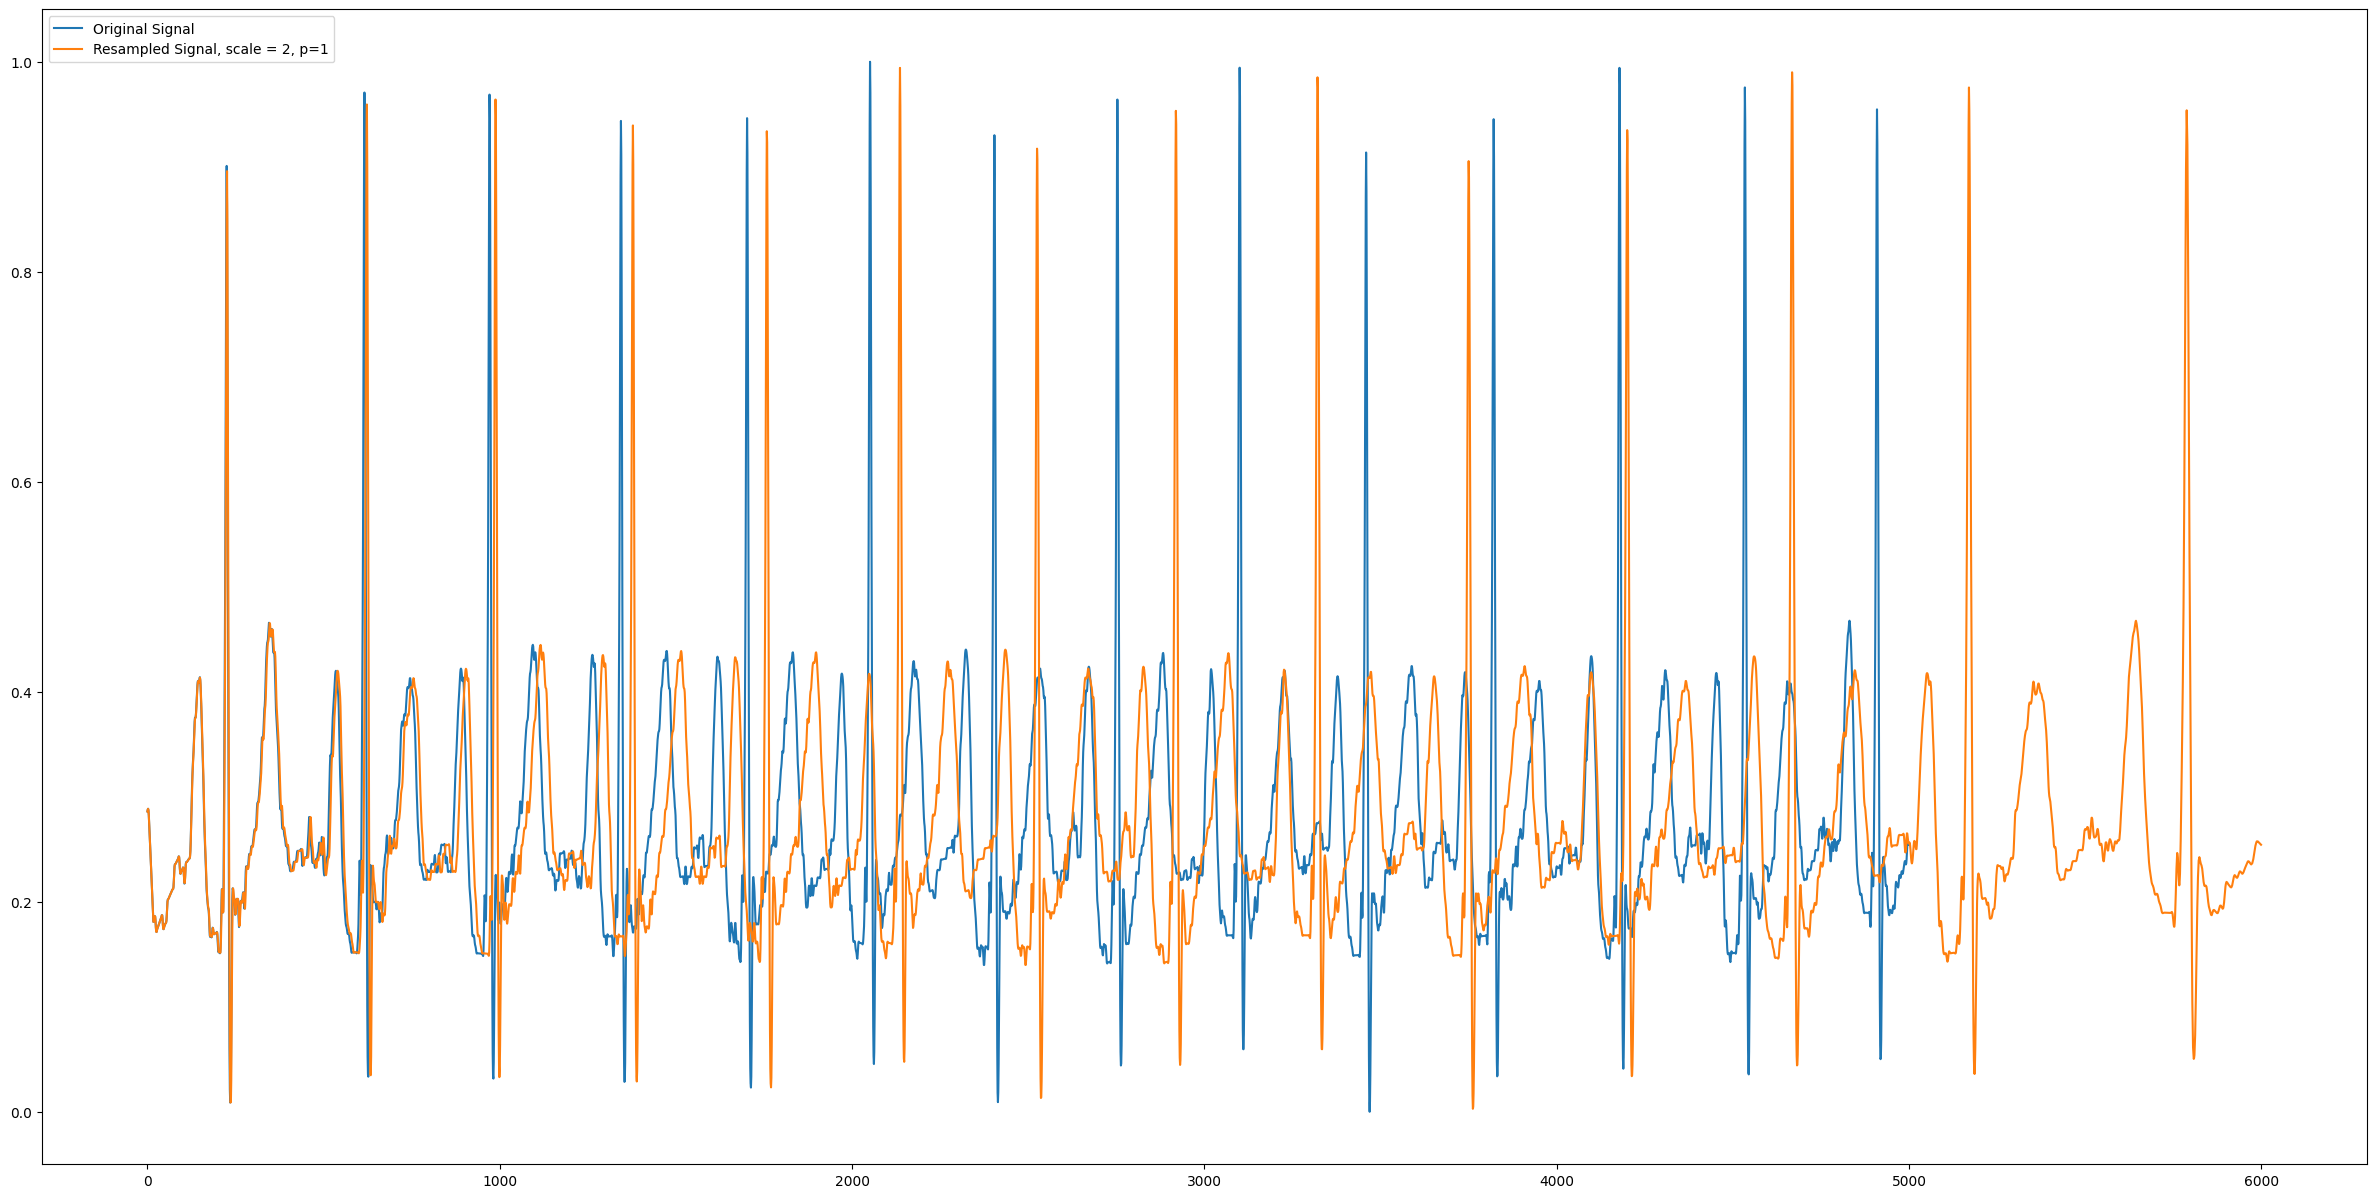

In [17]:
def resample_linear_align_1stpeak(mseq, scale, p):
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    original_length = len(mseq)
    new_length = int(original_length * scale)
    x_orig = np.linspace(0, original_length - 1, original_length)

    # Generate a non-linearly spaced array for x,

    x_new = np.linspace(0, 1, new_length)
     # Updated line
    x_new = np.power(x_new, scale) 
    x_new *= (original_length - 1)

    # Reverse the order of peaks
    mseq = np.flip(mseq)

    interpolator = interpolate.interp1d(x_orig, mseq)
    signal_resampled = interpolator(x_new)

    # Reverse the order of the resampled signal
    signal_resampled = np.flip(signal_resampled)

    return signal_resampled

signal_resampled = resample_linear_align_1stpeak(signal_1st, scale = 1.2, p=1 )

# Plot the original and resampled signals
plt.figure(figsize = (30,15))
plt.plot(signal_1st, label='Original Signal')
plt.plot(signal_resampled, label='Resampled Signal, scale = 2, p=1')
plt.legend(loc = 'upper left')
plt.show()

# RESAMPLE LINEAR

 resample_linear is designed to perform a linear resampling transformation on the input signal. This transformation aims to change the signal's duration while maintaining its shape. The primary goal of this visualization is to illustrate how the signal's duration changes when the linear resampling transformation is applied, providing insight into the effects of this transformation on the signal's temporal characteristics and shape.

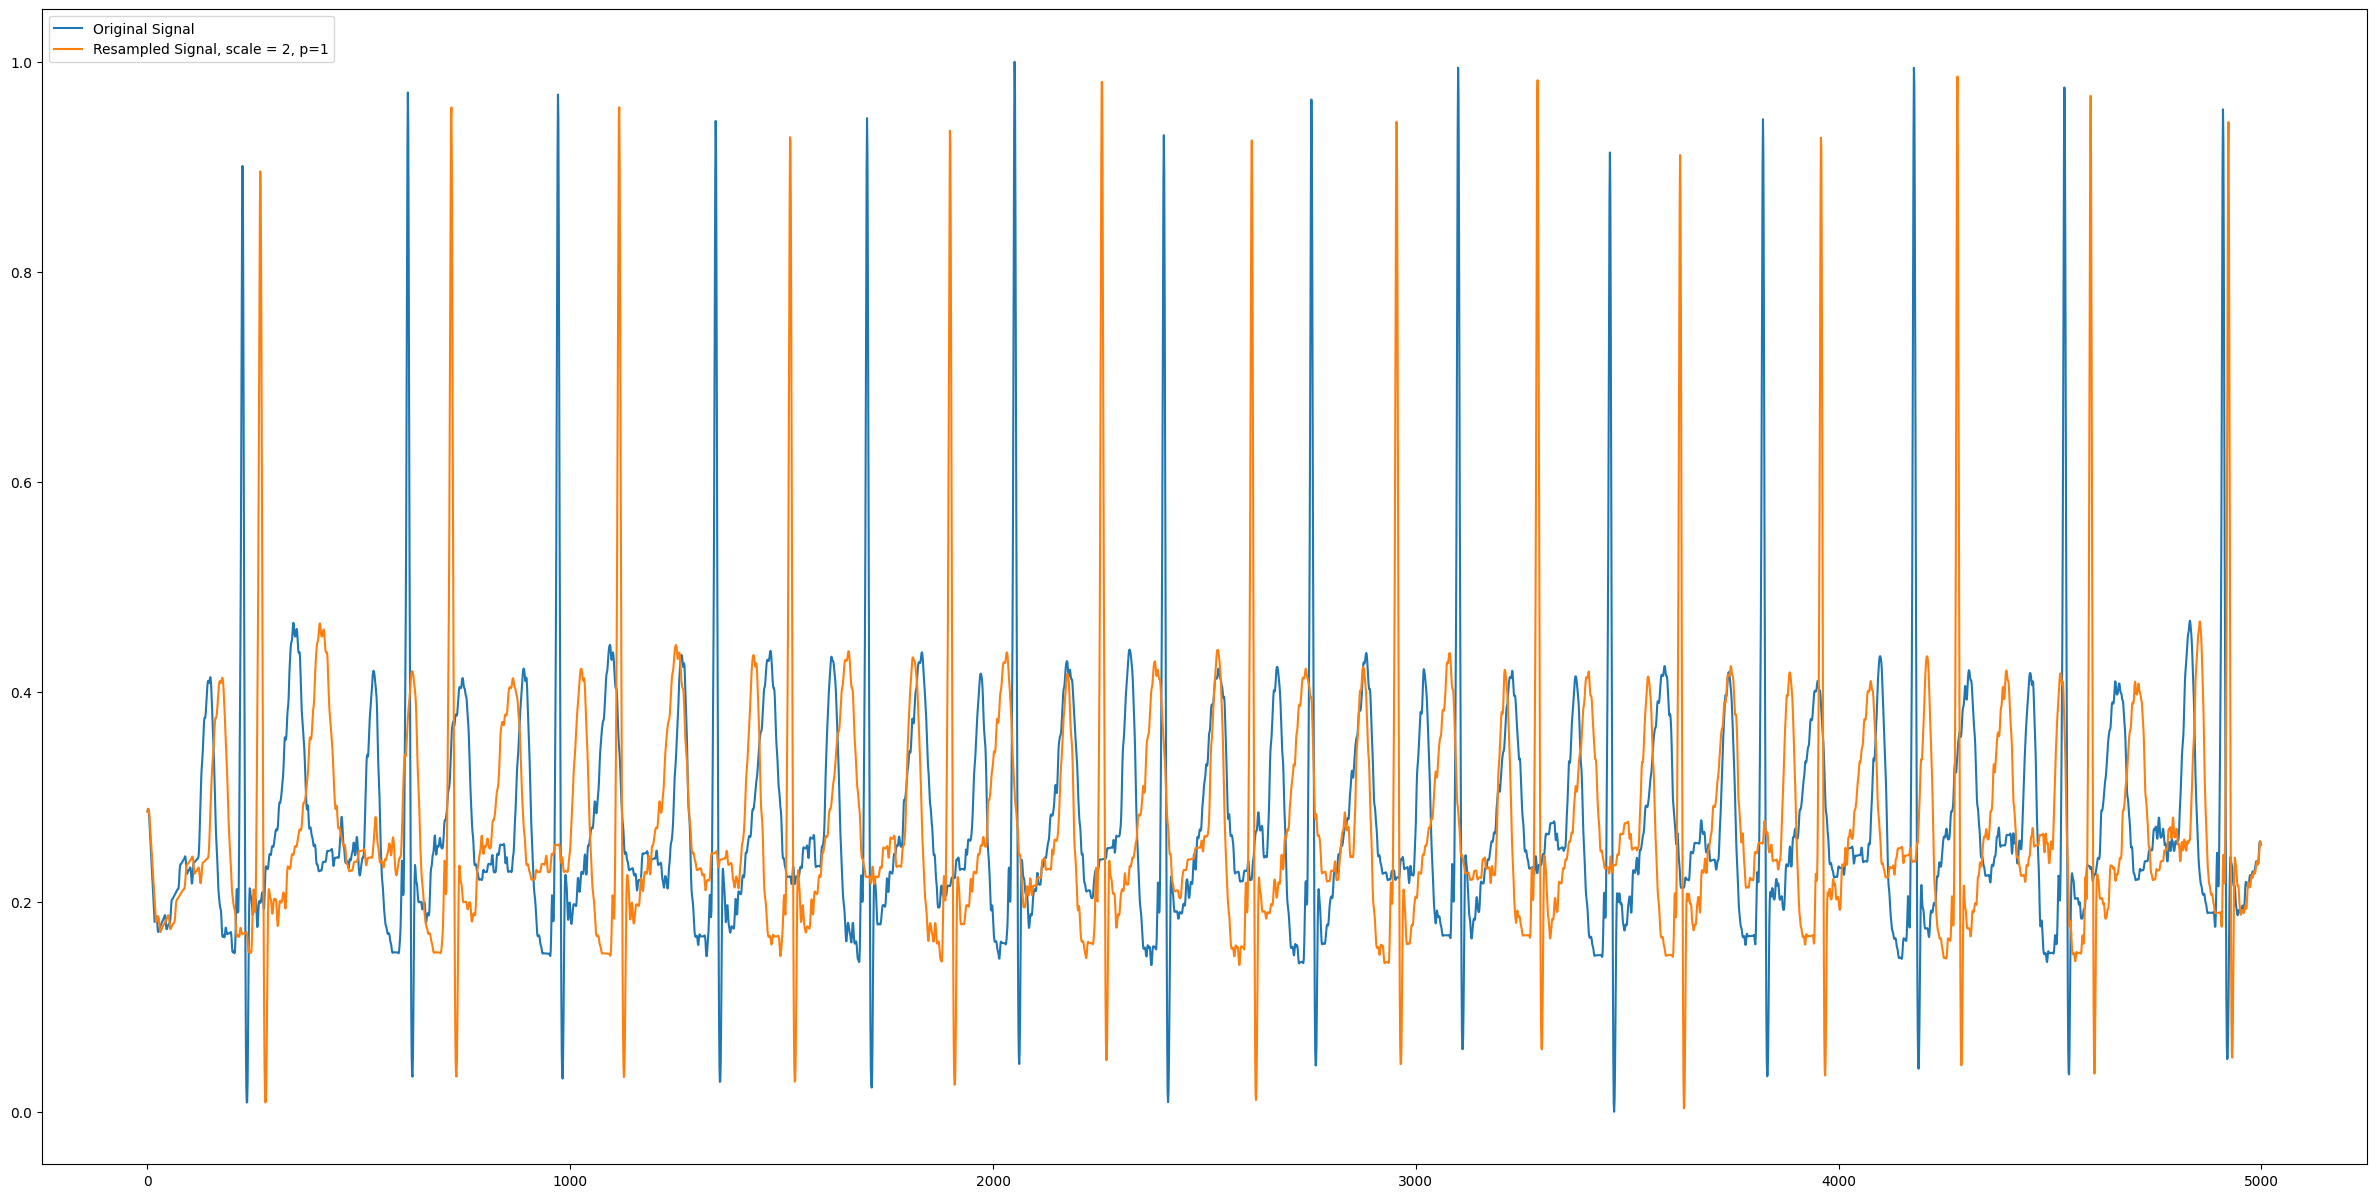

In [18]:
def resample_linear(mseq, scale, p):
    if p < np.random.rand(1):
        return mseq
    x_orig = np.arange(0, len(mseq))
    #scale = np.random.uniform(self.sca, scale) 
    scale = scale
    scale = np.linspace(1,scale,len(x_orig))
    x_new = x_orig*scale
    x_new = x_new*(x_orig[-1]/x_new[-1])
    mseq1 = np.interp(x_new, x_orig, mseq)
    return mseq1

signal_resampled = resample_linear(signal_1st, scale = 1.2, p=1 )

# Plot the original and resampled signals
plt.figure(figsize = (30,15))
plt.plot(signal_1st, label='Original Signal')
plt.plot(signal_resampled, label='Resampled Signal, scale = 2, p=1')
plt.legend(loc = 'upper left')
plt.show()

# RESAMPLE TRIANGLE

 resample_triangle is designed to perform a resampling transformation that incorporates a triangular-shaped variation in the resampling scale. This transformation aims to alter the signal's duration while introducing a triangular modulation in the scale factor. The primary purpose of this visualization is to illustrate how the signal's duration changes while introducing triangular variation in the resampling scale when the resample triangle transformation is applied.

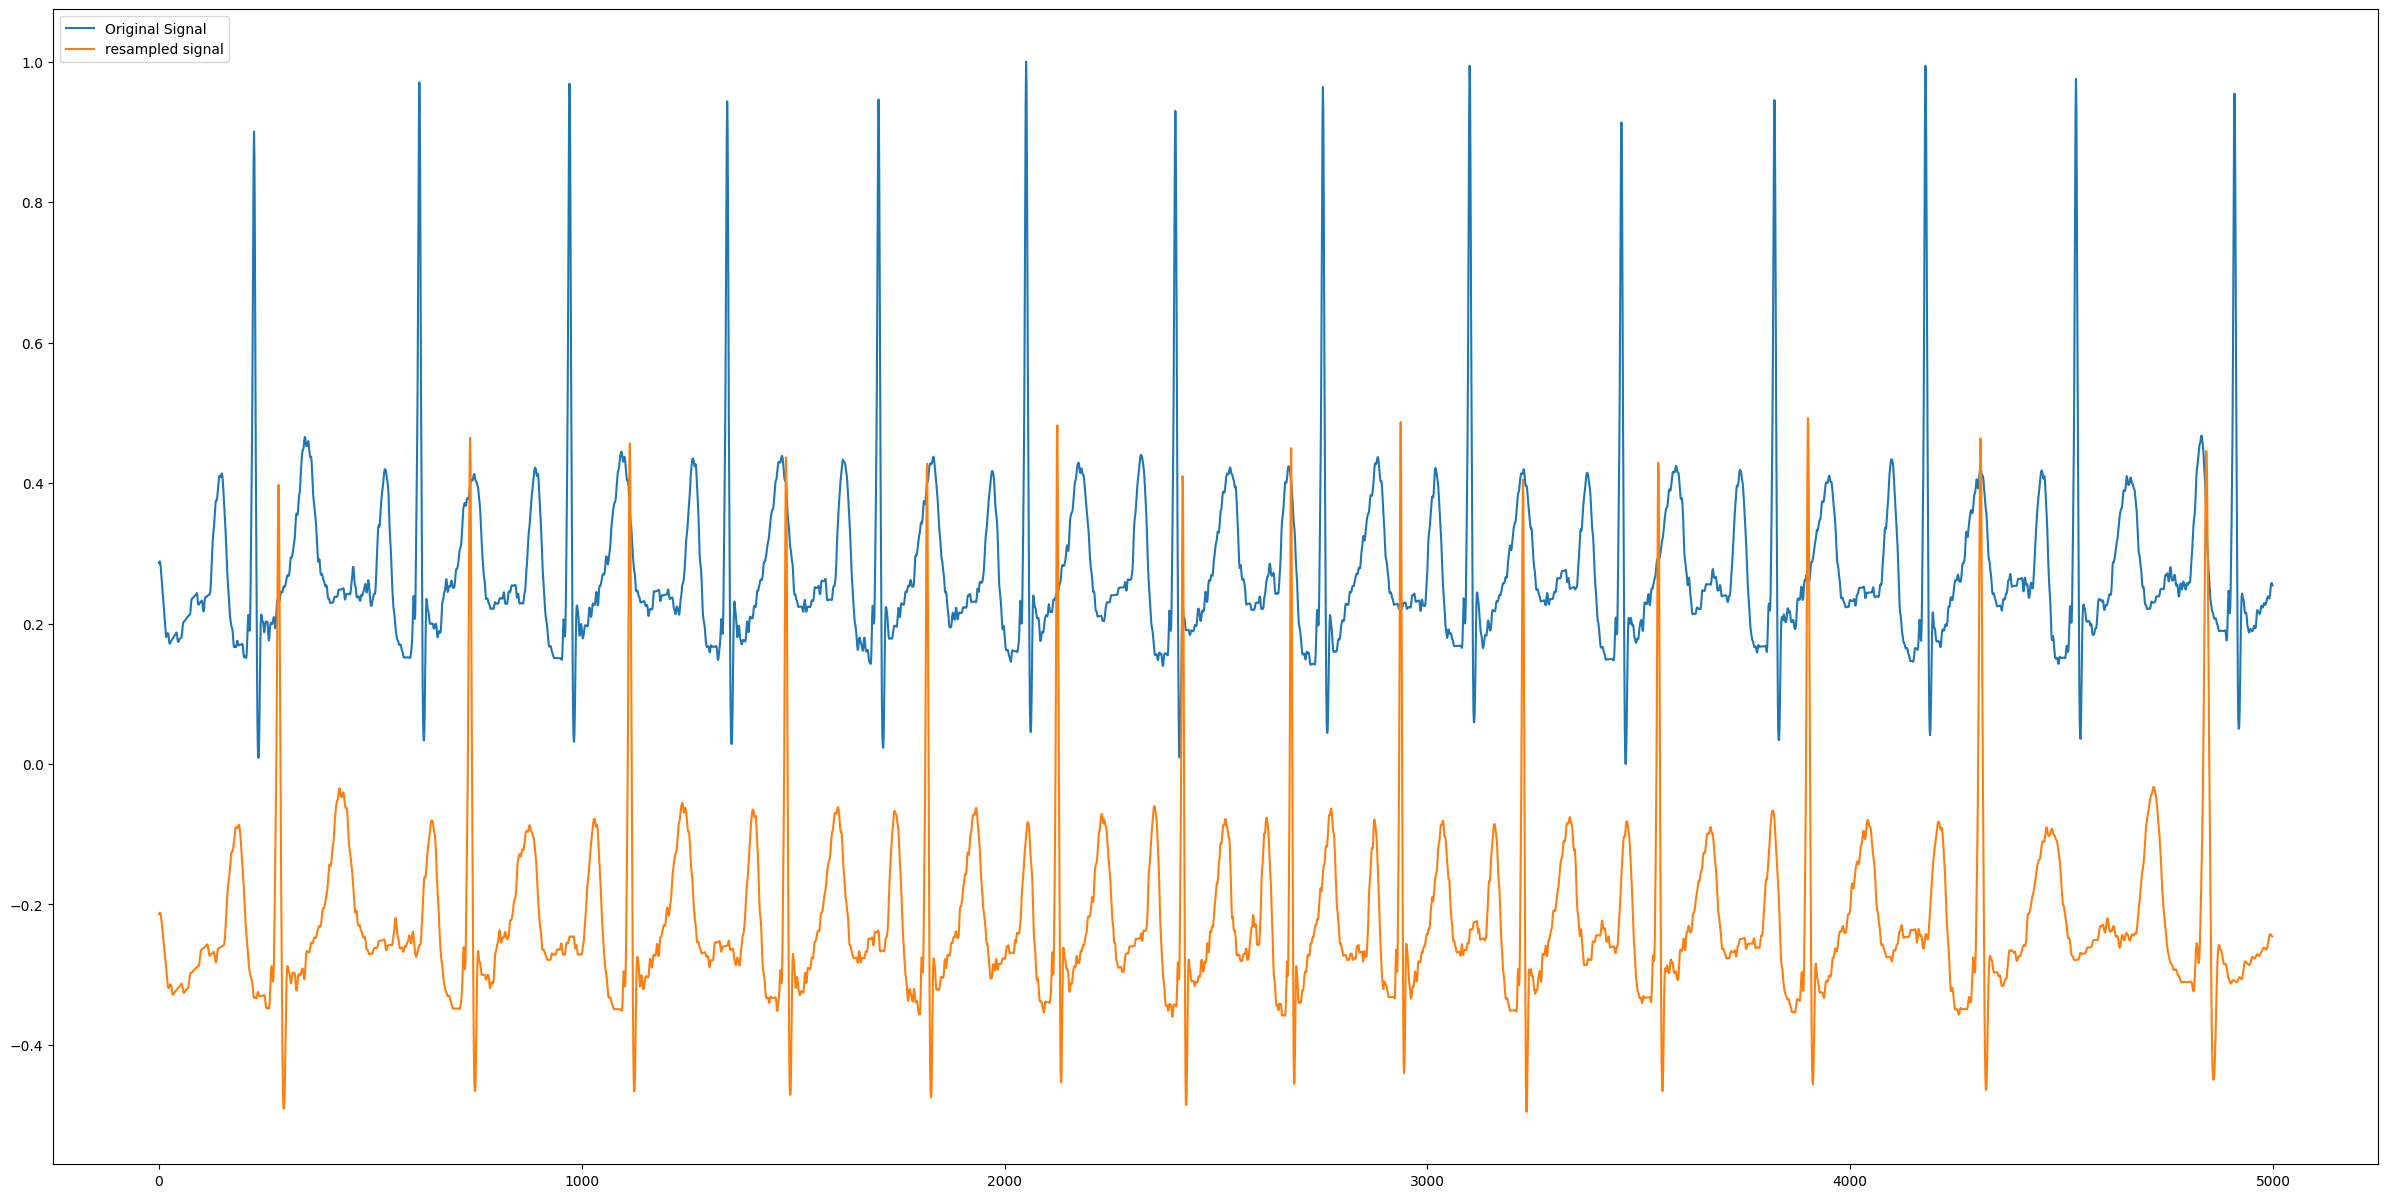

In [19]:
def resample_triangle(mseq, scale, p=1):
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    mid = int(len(mseq) / 2)
    np.random.seed(0)
    scale_range = np.linspace(1/scale, scale, num=100)
    scale1 = np.random.choice(scale_range)
    scale2 = math.log(2)/scale1
    #scale1 = np.random.uniform(1/scale, scale)   
    mseq_m1 = mseq[:mid]
    mseq_m2 = mseq[mid+1:]

    mseq_m1_rti = resample_linear(mseq_m1, scale, p)
    mseq_m2_rti = resample_linear(mseq_m2, scale2, p)
    mseq1 = np.concatenate([mseq_m1_rti, mseq_m2_rti])
    return mseq1

rt122 = resample_triangle(signal_1st, scale =1.3, p=1)

# Plot the original and resampled signals
plt.figure(figsize = (30,15))
plt.plot(signal_1st, label='Original Signal')
plt.plot(rt122-0.5, label ='resampled signal')
#plt.plot(normalized_rt1, label='normalized signal after transformation')
plt.legend(loc = 'upper left')
plt.show()

# MULTIPLY SINE

 multiply_sine is designed to perform a signal transformation that involves multiplication of the input signal by a sinusoidal waveform.  The main purpose of this visualization is to illustrate how the signal's amplitude changes based on the modulation introduced by the sinusoidal waveform when the multiply sine transformation is applied.

In [20]:
def multiply_sine(mseq, fs, f, a, p=1):
    mseq = copy.deepcopy(mseq)
    if p < np.random.rand(1):
        return mseq
    t = np.arange(len(mseq))/fs
    #f1, a1 = np.random.uniform(0,f), np.random.uniform(0,a)
    mseq1 = mseq*(1 + a*np.sin(2*np.pi*f*t))
    return mseq1

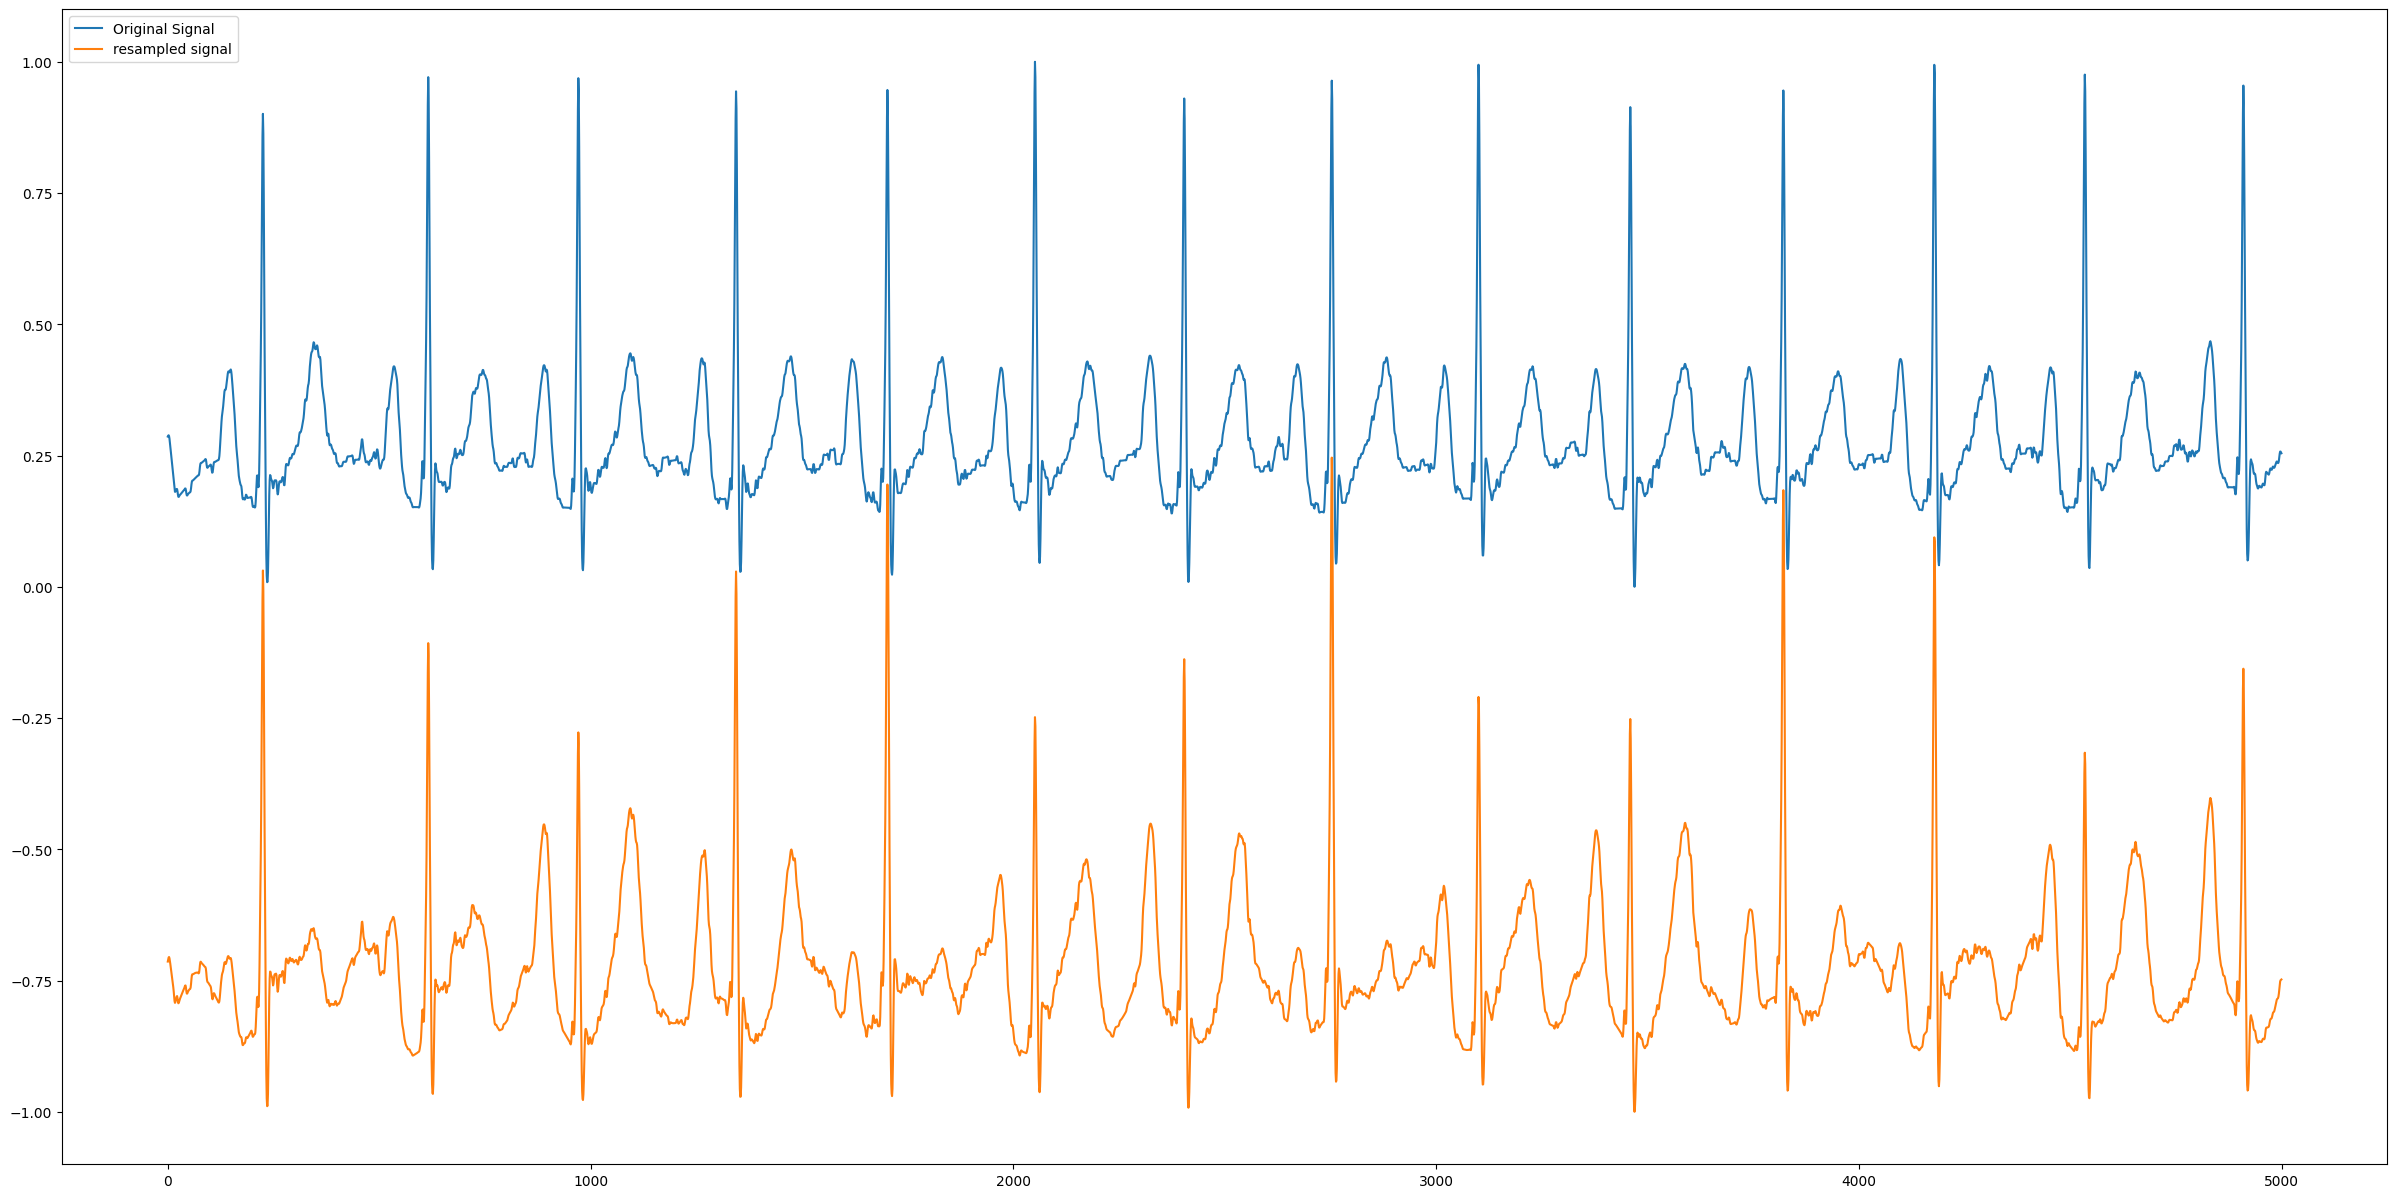

In [21]:
ms = multiply_sine(signal_1st, fs = 250, f=1.2, a=0.3, p=1)

# Plot the original and resampled signals
plt.figure(figsize = (30,15))
plt.plot(signal_1st, label='Original Signal')
plt.plot(ms-1, label ='resampled signal')
#plt.plot(normalized_rt1, label='normalized signal after transformation')
plt.legend(loc = 'upper left')
plt.show()

# EQUAL_SEGMENTS_RESAMPLE

The "equal_segment_resample" function accepts a 12-lead electrocardiogram (ECG) signal as its input. It detects the peaks in the signal's initial lead and segments the signal into several parts, where each segment extends between two consecutive peaks. Furthermore, it separates the sections preceding the first peak and following the last peak into distinct arrays.

Afterwards, using a designated algorithm, an effort is made to achieve approximately uniform lengths for each segment. Initially, the total number of samples is uniformly distributed among all the segments. Subsequently, the "Resampling_Coefficients" function is employed to compute coefficients corresponding to each segment. By multiplying the equal-length segments from the preceding step by their corresponding coefficients, the precise length of each segment is attained. This is performed to ensure that every segment possesses the same length as the original signal after the resampling process.

In the final phase, every segment is resampled to its exact length, and these resampled segments are then combined with the portions before the first peak and after the last peak. This concatenation restores the complete signal.

The "Resampling_Coefficients" function employs a sinusoidal function that spans a positive range. The cumulative sum of the coefficients generated by this function is equivalent to the number of segments. By modifying the domain of the function, particularly the ascending or descending segment of the sinusoidal curve, the values of the coefficients undergo alterations. Consequently, this adjustment influences the spacing between peaks in the signal, either increasing or decreasing it.

Peaks: [ 225  616  971 1344 1702 2051 2404 2753 3100 3459 3821 4178 4534 4909]


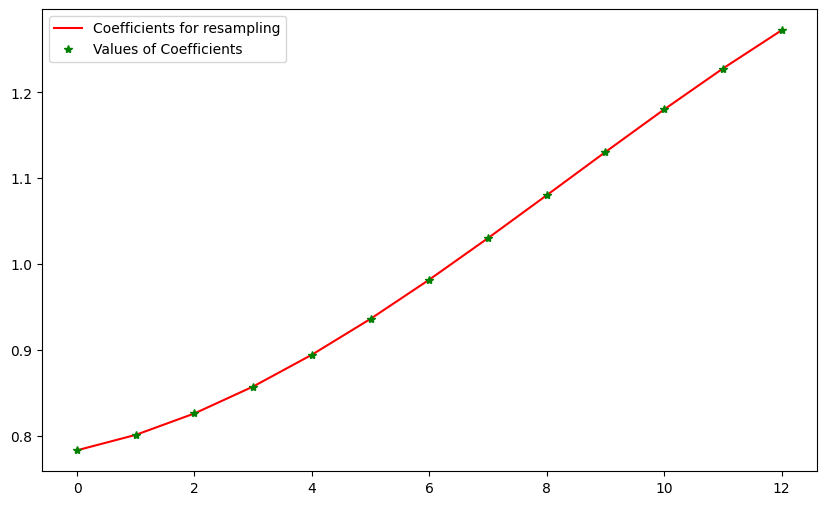

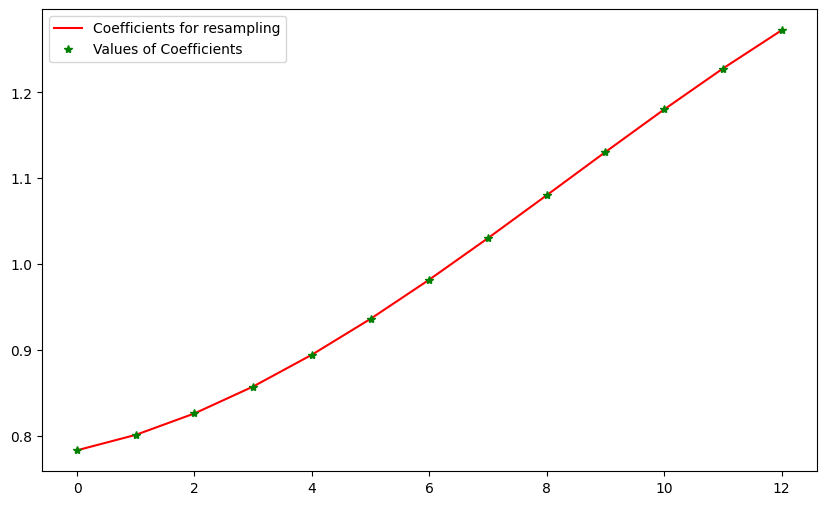

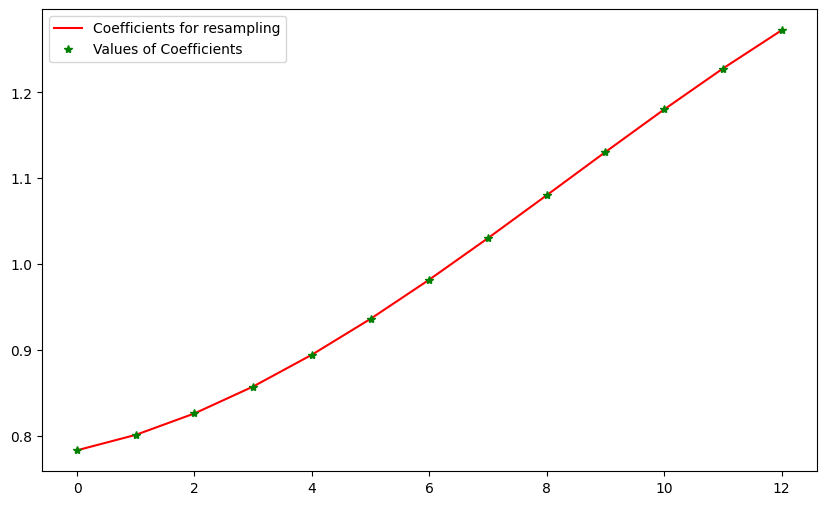

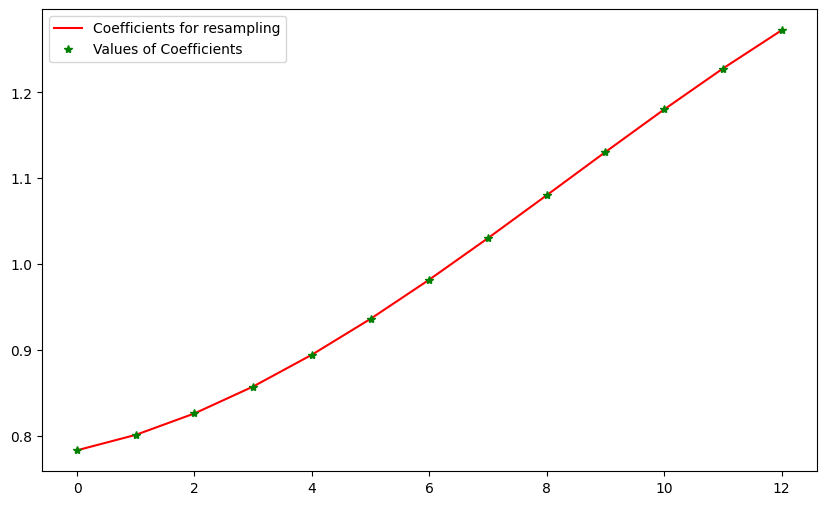

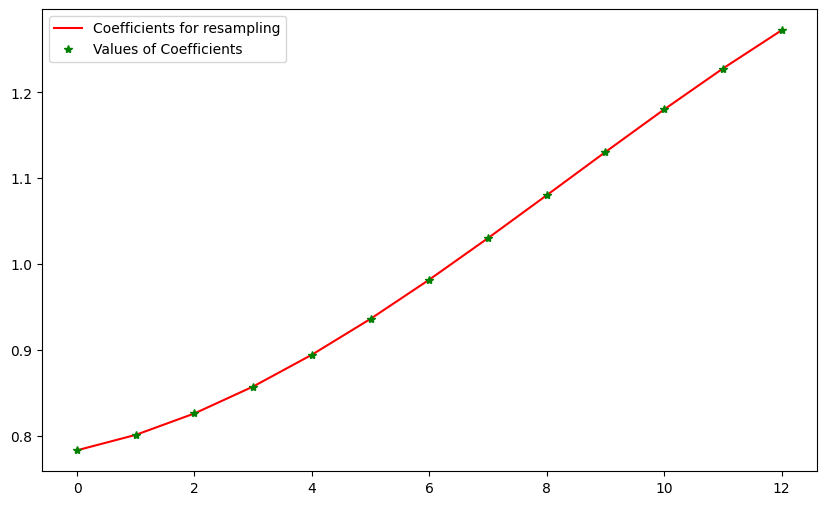

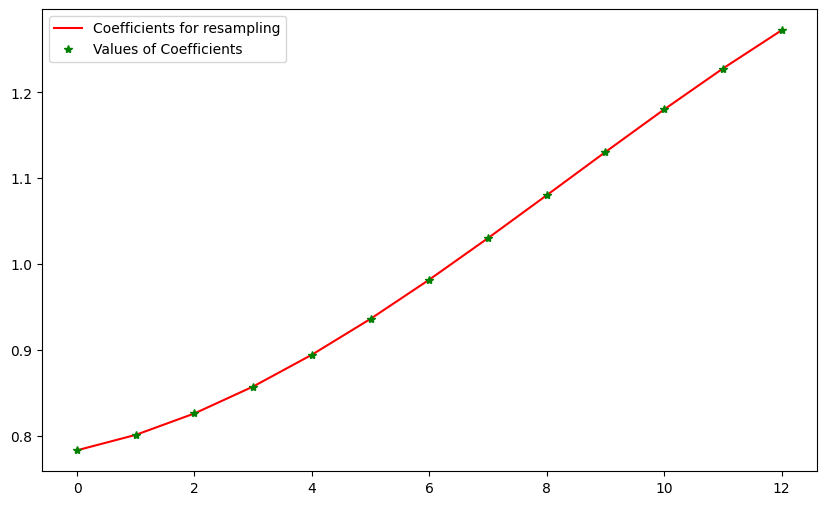

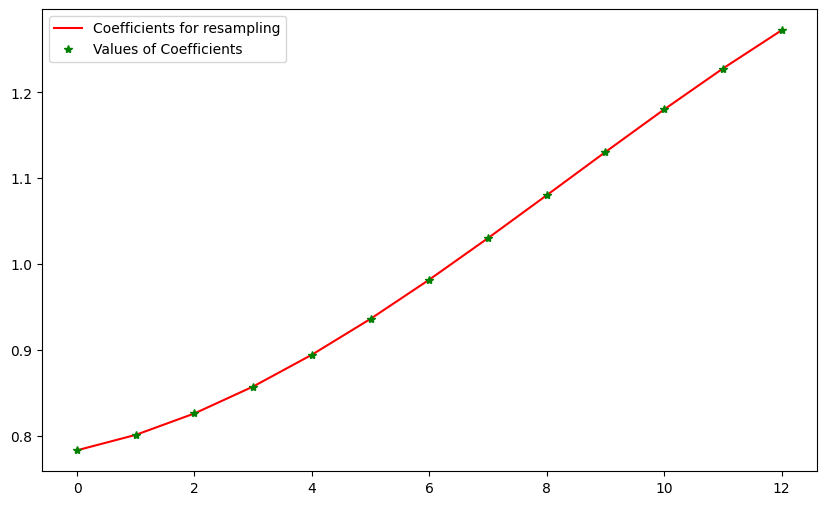

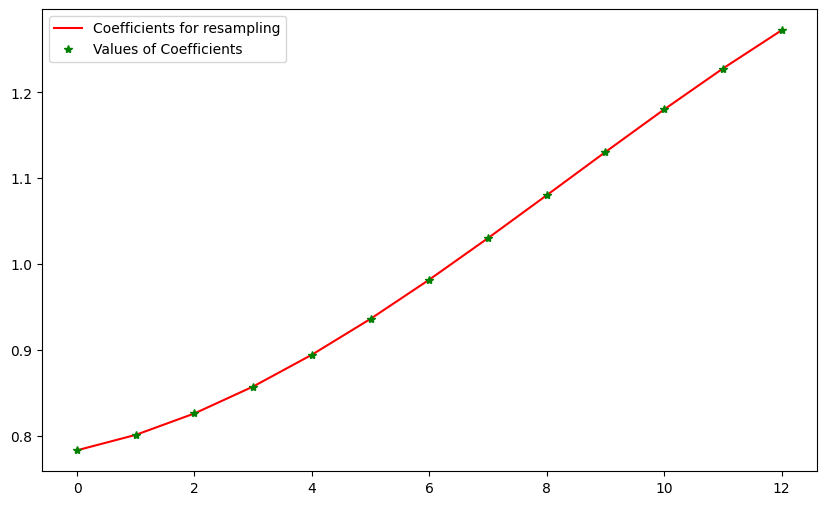

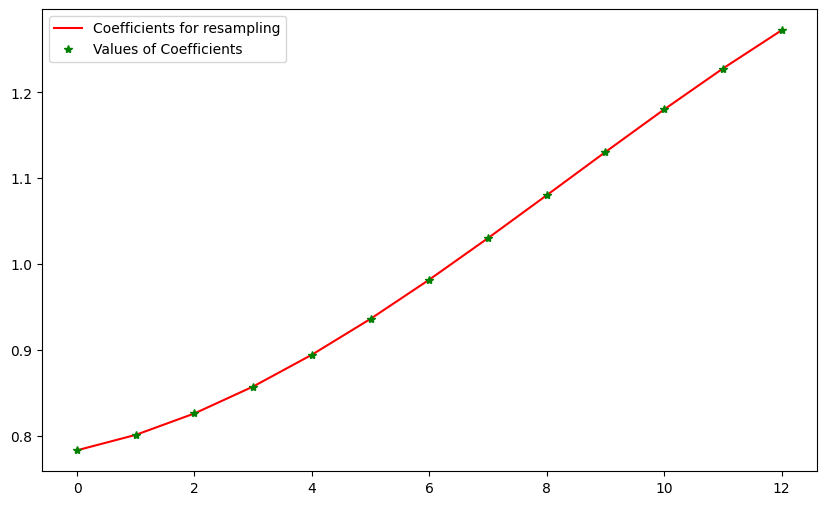

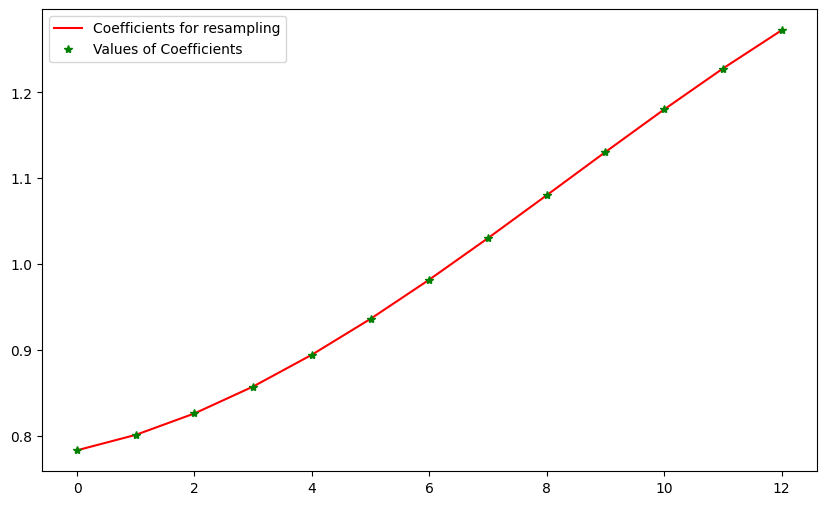

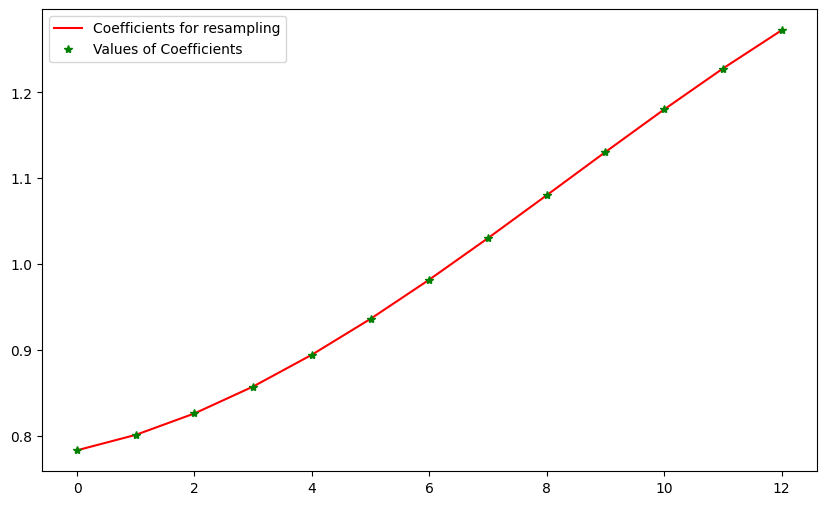

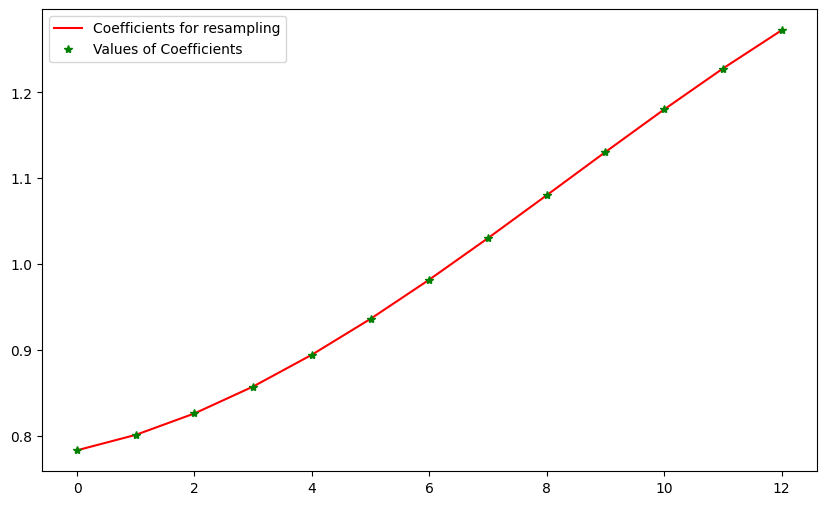

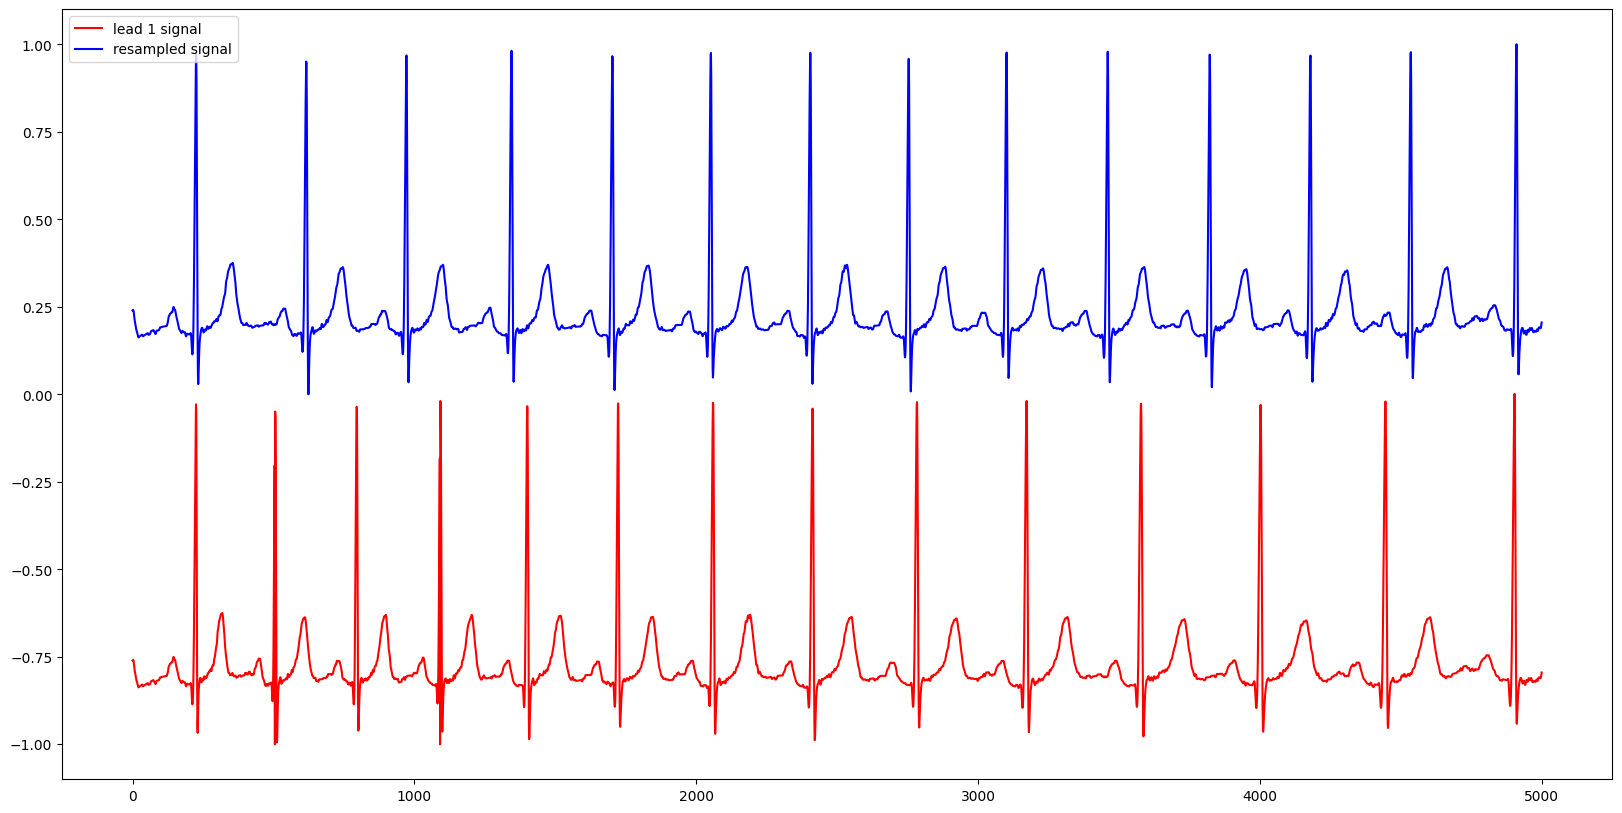

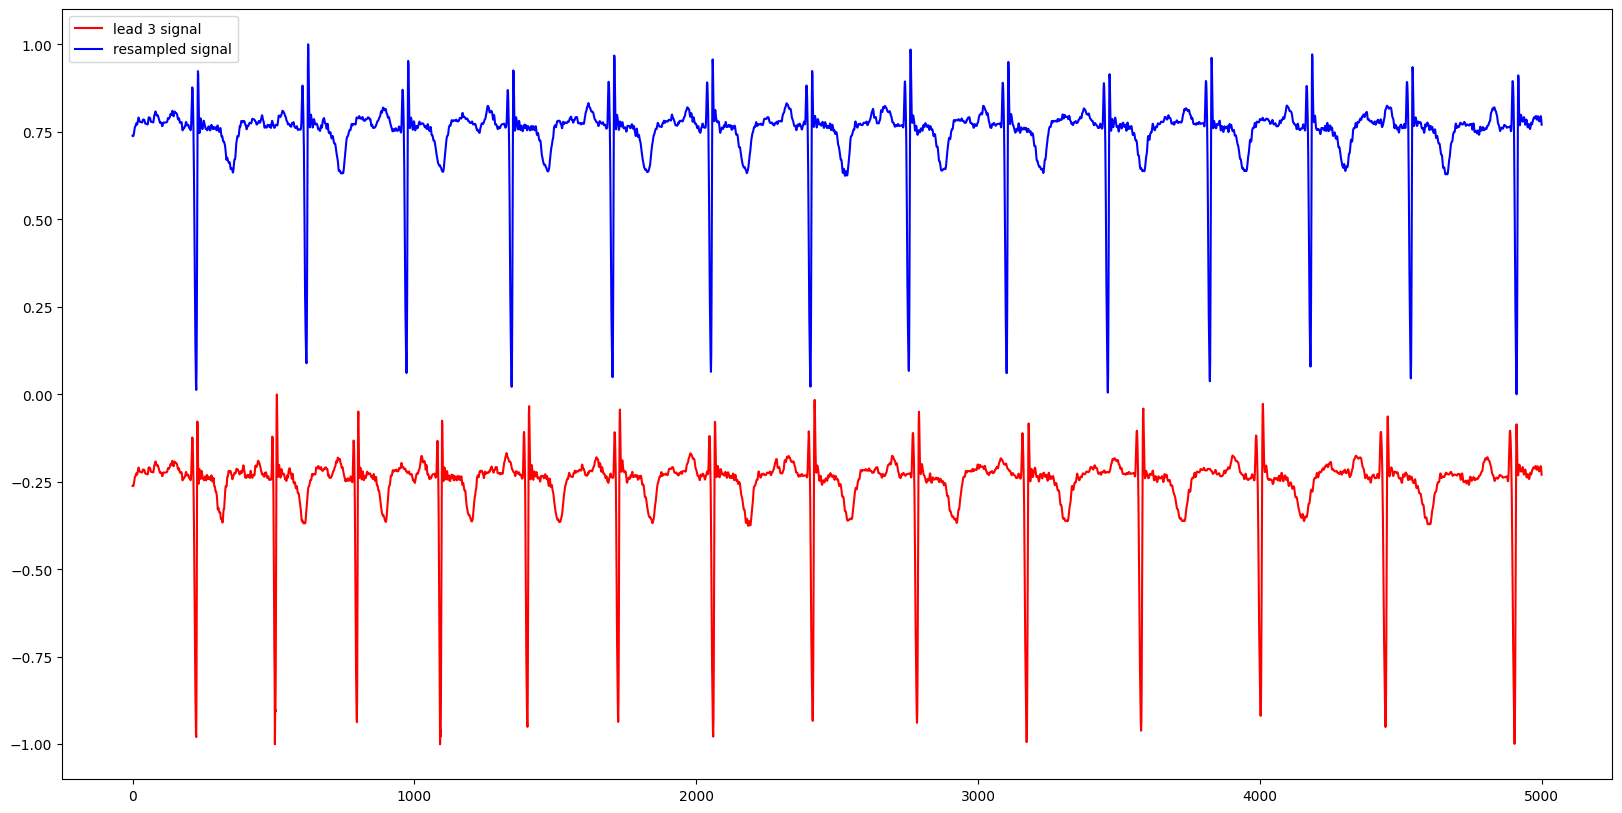

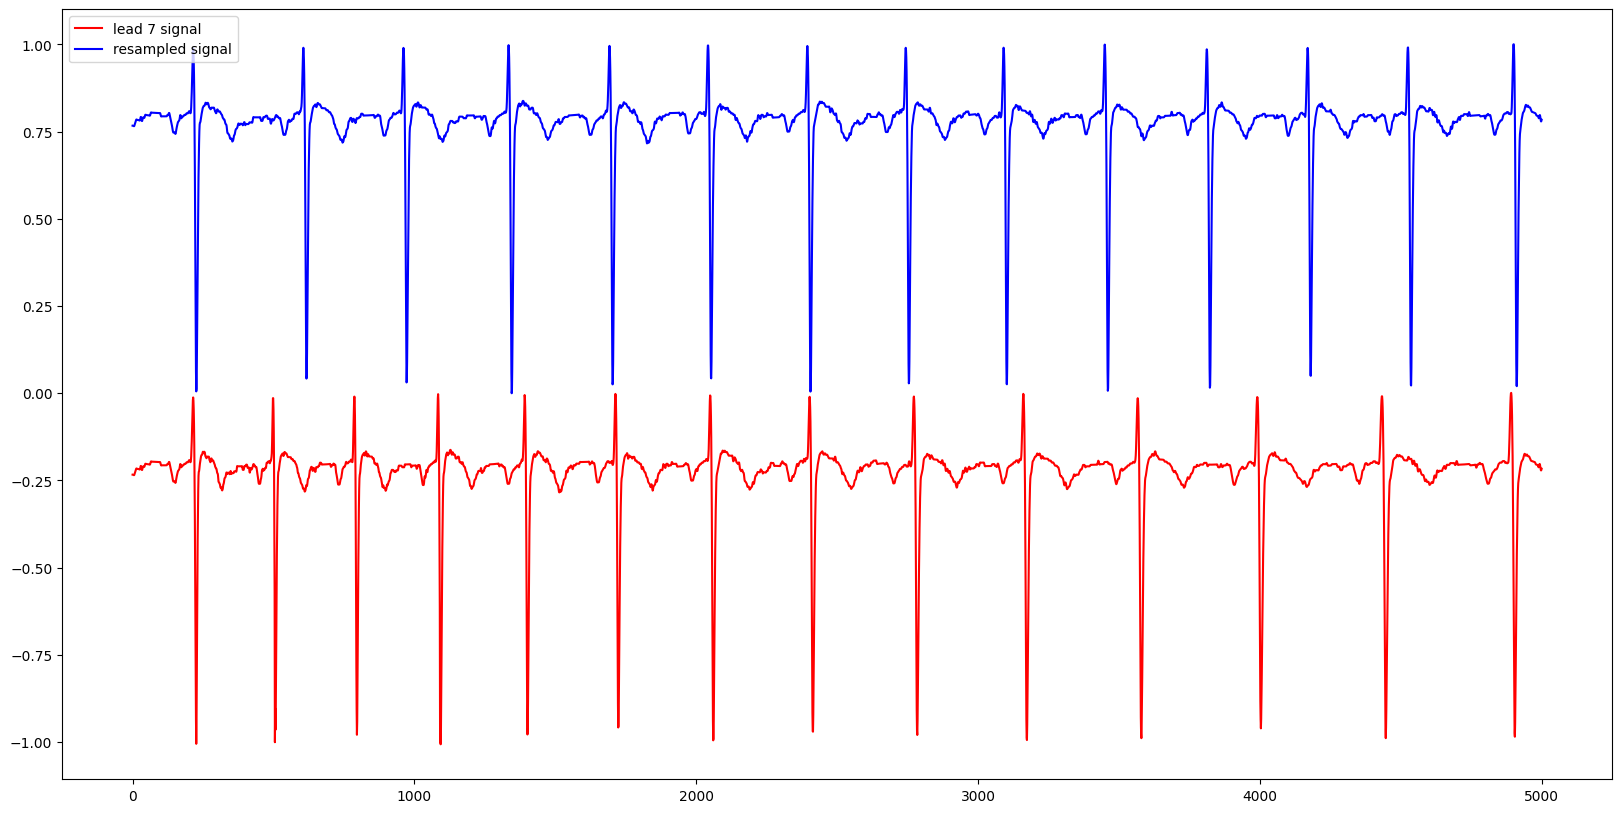

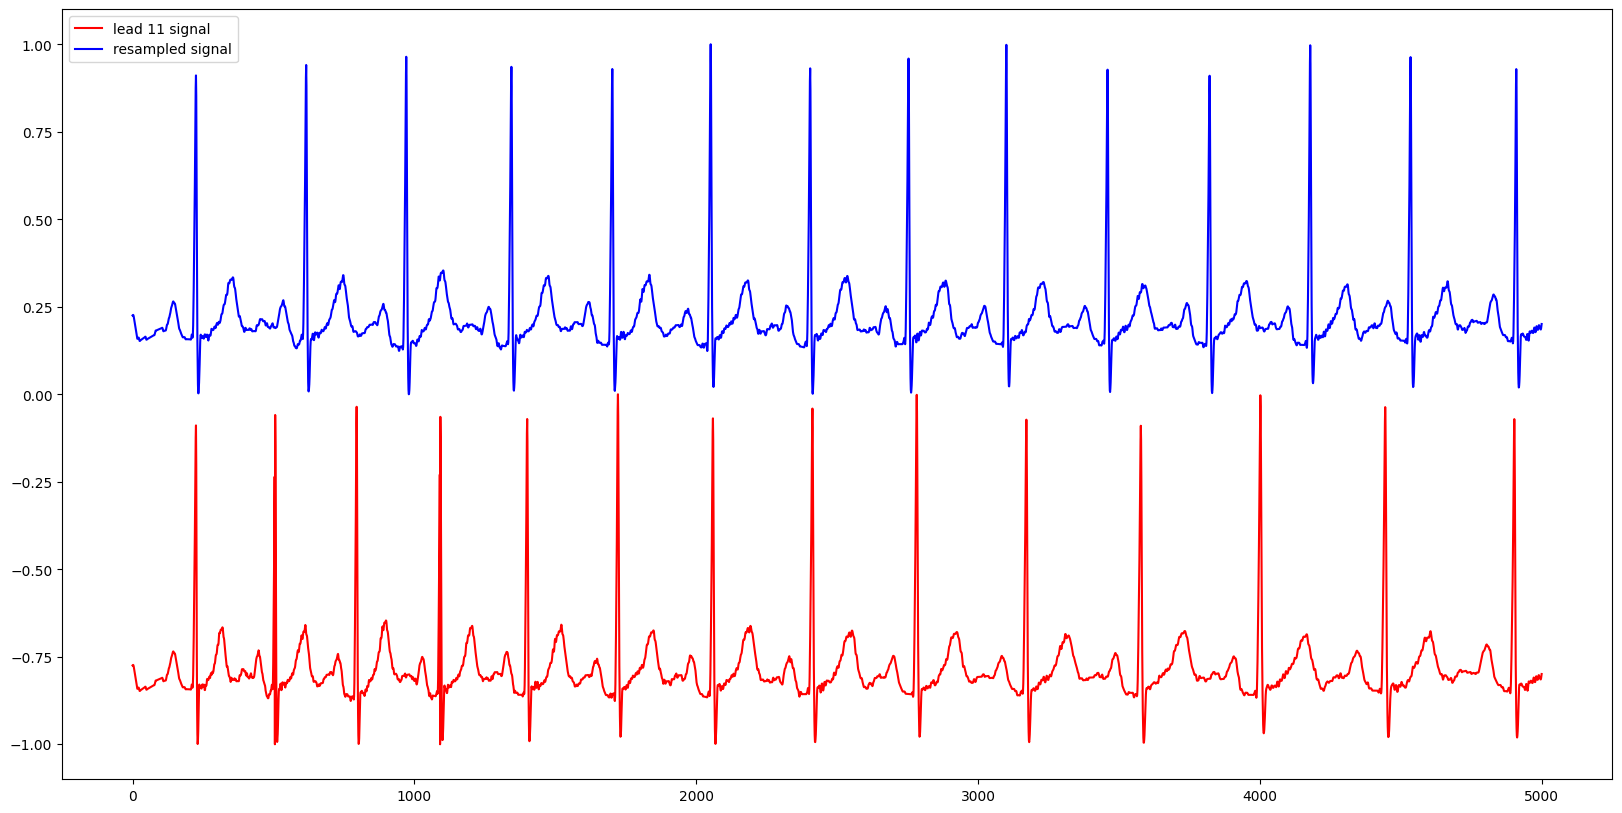

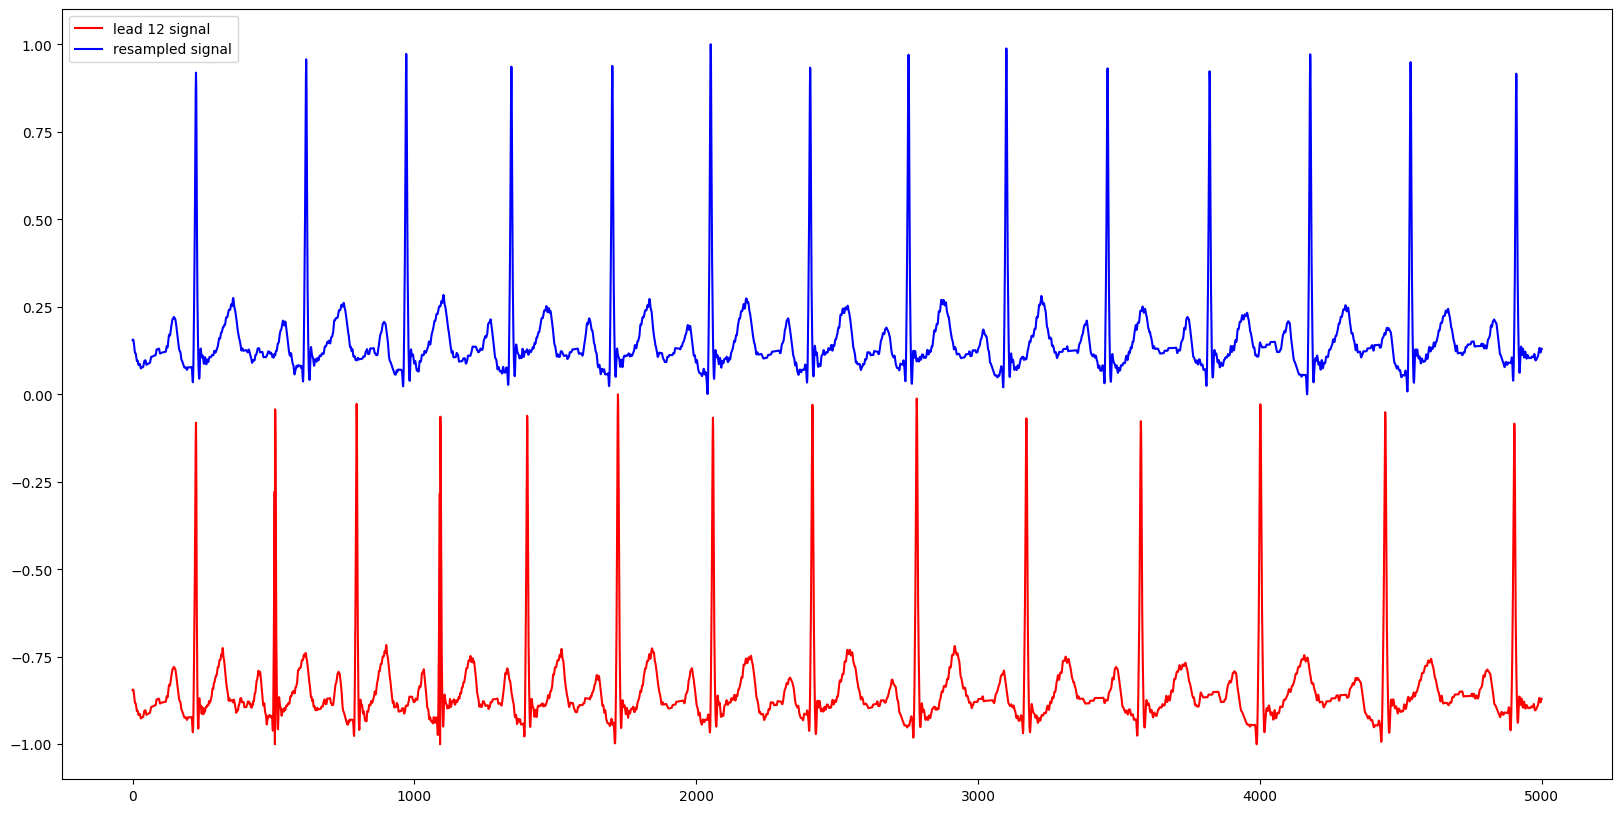

In [23]:
# Define the Peak_detection function

def Peak_detection(mseq):
    #cleaned = nk.ecg_clean(mseq[0, :], method="hamilton2002")
    _, info = nk.ecg_peaks(mseq[0, :], method="martinez2004")
    Peaks_part = info["ECG_R_Peaks"]
    firstPart = []
    lastPart = []

    for row in mseq:
        first = row[:Peaks_part[0]]
        last = row[Peaks_part[-1]:]
        firstPart.append(first)
        lastPart.append(last)

    return Peaks_part, firstPart, lastPart


# Define the Peak_detection function

def Peak_detection(mseq):
    #cleaned = nk.ecg_clean(mseq[0, :], method="hamilton2002")
    _, info = nk.ecg_peaks(mseq[0, :], method="martinez2004")
    Peaks_part = info["ECG_R_Peaks"]
    firstPart = []
    lastPart = []

    for row in mseq:
        first = row[:Peaks_part[0]]
        last = row[Peaks_part[-1]:]
        firstPart.append(first)
        lastPart.append(last)

    return Peaks_part, firstPart, lastPart


def separate_segments(filtered_signal, Peaks_part):
    segments = []
    for i in range(len(Peaks_part) - 1):
        start_index = Peaks_part[i]
        end_index = Peaks_part[i+1]
        segment = filtered_signal[start_index:end_index]
        segments.append(segment)
    return segments

def Resamling_Coefficients(A2, A3, Peaks):
    A1 = Peaks.shape[0]-1
    x = np.arange(5, 7, (7-5)/A1)
    y = np.sin(x)
    sumation = np.sum(y)
    minimmum = np.min(y)
    y1 = y + (-1 * minimmum)
    maaximmum = np.max(y1)
    y2 = y1 * ((A2 - A3) / maaximmum)
    y3 = y2 + A3
    coeff = np.array((y3 * (len(y3) / np.sum(y3))))
    plt.figure(figsize=(10, 6))
    plt.plot(coeff, color='red')
    #for i, c in enumerate(coeff):
    #    plt.plot(i, c, '*', color='green')
    #    plt.legend(('Coefficients for resampling','Values of Coefficients',), loc='upper left')
    plt.show()

    return coeff

def equal_segment_resample(mseq, p=1):
    
    resampled = np.zeros_like(mseq)  # Initialize resample_signal array
    # Peak detection
    # Split the parts of signal before the Peak and after the last Peak
    Peaks_part, firstPart, lastPart = Peak_detection(mseq)
    print('Peaks:',Peaks_part)

    for i, row in enumerate(mseq):
        mseq[i, :] = copy.deepcopy(row)
        if p < np.random.rand(1):
            return mseq

        # Signal Segmentation
        segments = separate_segments(row, Peaks_part)
        
        # Calculating the sumation of all segments
        seg_sum = 0
        for segment in segments:
            seg_sum = seg_sum + len(segment)
        # Calculating the desired lengh of each segment
        B1 = seg_sum / ((Peaks_part.shape[0]) - 1)
        S1 = []
        S2 = []
        S3 = 0
        for B2 in np.arange(0, seg_sum, B1):
            S3 = S3 + 1
            S1.append(np.round(B2))
            if S3 > 1:
                S2.append(S1[S3 - 1] - S1[S3 - 2])
        S2.append(seg_sum - np.sum(S2))
        # Resampling all segments to achieve desired lengths that must be approximately equal
        eq_s = []
        for j, s in zip(range(len(segments)), S2):
            b = nk.signal_resample(segments[j], desired_length=s, sampling_rate=None, desired_sampling_rate=None,
                                   method='interpolation')
            eq_s.append(b)
        
        coeff = Resamling_Coefficients(A2=1.3, A3=0.8, Peaks=Peaks_part)

        # Resampling segments with desired coefficients
        res_seg = []
        for t, c in zip(range(len(eq_s)), coeff):
            a = nk.signal_resample(eq_s[t], desired_length=int(len(eq_s[t]) * c), sampling_rate=None,
                                   desired_sampling_rate=None, method='interpolation')
            res_seg.append(a)
            
        
        ss = 0
        for r in res_seg:
            ss = ss + len(r)
        diff = np.sum(S2) - ss
        resample_sig = np.array([])
        if diff > 0:
            l = nk.signal_resample(lastPart[i], desired_length=(diff + len(lastPart[i])), sampling_rate=None,
                                   desired_sampling_rate=None, method='interpolation')
            
        # Concatenation of resampled segments to achieve resampled signal
            resample_sig = np.concatenate([firstPart[i], np.concatenate(res_seg), l])
        elif diff == 0:
            resample_sig = np.concatenate([firstPart[i], np.concatenate(res_seg)])
        resampled[i,:] = resample_sig
    return resampled

ep = equal_segment_resample(filtered_signal, p=1)

for i in range(filtered_signal.shape[0]):
    plt.figure(figsize=(20, 10))
    plt.plot(ep[i, :]-1 , color='red')
    plt.plot(filtered_signal[i, :], color='blue')

    plt.legend(('lead 'f'{i+1} signal', 'resampled signal'), loc='upper left')
    plt.show()